# **Mod20.1_AIML_CAPSTONE: Sales Analysis - Late delivery risk and fraud analysis - Initial Report and EDA**

# **Introduction**

#### **Executive summary**:
This project focuses on building a Sales Fraud and Late Delivery Detection Model to strengthen supply chain integrity and operational efficiency. By leveraging transactional, regional, and customer-level data from a supply chain dataset, the project applies advanced anomaly detection techniques to identify fraudulent sales activity and late delivery patterns. In addition to analyzing customer and sales trends, fraud and delivery anomalies are studied to highlight risks in specific geographies, sales channels, and customer segments.

The outcomes will support strategic decision-making by enabling the company to:

*  Detect and mitigate fraudulent sales transactions before they impact revenue.
*  Identify late delivery patterns and reduce operational inefficiencies.
*  Enhance customer trust and satisfaction by proactively addressing anomalies.
*  Reduce financial losses and reputational risks associated with fraud and delivery failures.

#### **Rationale**:
Understanding customer behavior is critical for businesses in a competitive marketplace. Fraudulent sales activities and late deliveries present significant challenges to businesses operating in competitive markets. Fraud directly leads to financial losses and inaccurate reporting, while delivery failures damage customer trust and loyalty. Detecting anomalies early allows organizations to implement corrective actions, strengthen internal controls, and optimize logistics strategies.

A fraud and late delivery detection framework helps address these challenges by:

*  Pinpointing suspicious transactions through anomaly detection techniques.
*  Predicting high-risk deliveries based on order, product, and regional attributes.
*  Enhancing monitoring of geographic or product-specific vulnerabilities.
*  Improving allocation of resources to fraud prevention and logistics optimization.

By solving this problem, the company can safeguard revenue, protect brand reputation, and improve customer experiences while minimizing risks in sales and delivery operations.

#### **Research Question**:
The central research question for this project is:

“How can we detect and classify anomalies in sales transactions and delivery records to prevent fraud and reduce late deliveries across regions?”

Supporting sub-questions:

*  Which transaction, product, and delivery attributes most strongly signal fraud or anomalies?
*  How do geographic and regional patterns influence fraud detection and late deliveries?
*  What machine learning models are most effective at detecting fraud and delivery risks?
*  How do preprocessing, feature engineering, and anomaly detection techniques impact model accuracy and interpretability?

#### **Data Sources**

What data will you use to answer your question?

The analysis uses the DataCo Supply Chain dataset, which includes detailed records of customer demographics, transactions, product sales, supply chain operations, and regional information. Specifically:

Customer Data: Demographics and segmentation details.

*  Transaction Data: Sales amounts, order quantities, payment methods, and timestamps.
*  Product Data: Categories, pricing, and supply chain attributes.
*  Supply Chain Data: Order processing, shipping, delivery status, and lead times.
*  Regional Data: Customer location and regional logistics performance.

The dataset used in this project is maintained transparently with the Creative Commons 4.0 license by Fabian Constante, Fernando Silva, and António Pereira through the Mendeley data repository. The dataset consists of roughly 180k transactions from supply chains used by the company DataCo Global for 3 years. This dataset provides a holistic view of customer interactions across regions, enabling robust classification modeling that considers both individual and regional behaviors.

The dataset can be downloaded from:

[DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS](https://data.mendeley.com/datasets/8gx2fvg2k6/5)


**Modeling Approach**

This project aims to compare multiple machine learning classification models to determine which algorithm best classifies customer sales behavior and supports the business objective of improving segmentation, targeting, and revenue growth.

Since the dataset comes from a supply chain context, important parameters related to customers, transactions, and products are identified and used to train the models. The goal is to classify customer sales patterns (e.g., likelihood to purchase, high-value customers, late delivery risks) and provide insights that help in predicting behavior and optimizing decision-making.

The classification models evaluated in this project include:

*  Logistic Regression
*  Gaussian Naive Bayes
*  Support Vector Machines (SVM)
*  k-Nearest Neighbors (KNN)
*  Decision Tree Classification
*  Random Forest Classification
*  Extra Trees Classification
*  Extreme Gradient Boosting (XGBoost)

Each model is compared using Accuracy, Precision, Recall, F1-score, and ROC-AUC, ensuring both balanced performance and business interpretability.

By benchmarking these models, the project will determine the most effective approach for answering the research question:
“How can organizations detect and classify anomalies in sales and delivery data to proactively address fraud and late delivery risks?”



### **Importing all required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
import time
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, QuantileTransformer, OneHotEncoder, LabelEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc, precision_score, roc_auc_score
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
RSEED = 42
np.random.seed(RSEED)

#Hiding the warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset using pandas
df=pd.read_csv("data/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
df.head(5)# Checking 5 rows in dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# Set pandas option to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# display(df.describe().T)

## Understanding the Features:

Examining the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

In [5]:
#Importing Dataset Columns Descriptions using pandas
df_desc=pd.read_csv("data/DescriptionDataCoSupplyChain - Column Description.csv",header= 0,encoding= 'unicode_escape')
df_desc.head(53)# Checking 5 rows in dataset

,FIELDS,DESCRIPTION
0,Type,Type of transaction made
1,Days for shipping (real),Actual shipping days of the purchased product
2,Days for shipment (scheduled),Days of scheduled delivery of the purchased pr...
3,Benefit per order,Earnings per order placed
4,Sales per customer,Total sales per customer made per customer
5,Delivery Status,"Delivery status of orders: Advance shipping , ..."
6,Late_delivery_risk,Categorical variable that indicates if sending...
7,Category Id,Product category code
8,Category Name,Description of the product category
9,Customer City,City where the customer made the purchase


# Data Cleaning

In [6]:
df.shape

(180519, 53)

The dataset consists a total of 180,519 rows/records and 53 columns

In [7]:
#Check for missing values
df.isna().sum() #Checking missing values


,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [8]:
df.isna().mean()

,0
Type,0.00
Days for shipping (real),0.00
Days for shipment (scheduled),0.00
Benefit per order,0.00
Sales per customer,0.00
Delivery Status,0.00
Late_delivery_risk,0.00
Category Id,0.00
Category Name,0.00
Customer City,0.00


The data consists of some missing values in:

*   Customer Lname
*   Product Description
*   Order Zipcode
*   Customer Zipcode

Which should be removed or replaced before proceeding with the analysis.
# context is very important with % of missing values - add code and comments


Since there is a chance there might be customers that have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

**Basic Column Name cleaning**


In [9]:
def clean_column_names(d):
    out = d.copy()
    out.columns = (
        out.columns.str.strip()
                    .str.replace("\n", " ", regex=False)
                    .str.replace(r"\s+", "_", regex=True)
                    .str.replace(r"[^0-9A-Za-z_]", "", regex=True)
                    .str.lower()
    )
    return out

df = clean_column_names(df)


In [10]:
print("\nData types:\n", df.dtypes)


Data types:
 type                            object
days_for_shipping_real           int64
days_for_shipment_scheduled      int64
benefit_per_order              float64
sales_per_customer             float64
delivery_status                 object
late_delivery_risk               int64
category_id                      int64
category_name                   object
customer_city                   object
customer_country                object
customer_email                  object
customer_fname                  object
customer_id                      int64
customer_lname                  object
customer_password               object
customer_segment                object
customer_state                  object
customer_street                 object
customer_zipcode               float64
department_id                    int64
department_name                 object
latitude                       float64
longitude                      float64
market                          object
order_city 

# Handle Incorrect Data Types

In [11]:
# Fix Incorrect Data Types

# 1. Convert any column with "date" in its name into datetime format
for col in df.columns:
    if "date" in col.lower():   # example: "Order Date", "Shipping Date"
        df[col] = pd.to_datetime(df[col], errors="coerce")

# 2. Convert known numeric columns to numbers
numeric_cols = ["order_item_quantity", "order_item_total", "order_item_discount"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


# 3.Quick check
print("\n==== AFTER FIXING DATA TYPES ====")
display(df.dtypes.head(10))
display(df.head(3))




==== AFTER FIXING DATA TYPES ====


,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class


## Handling missing values

In [12]:
# Handle Missing Values
display("\nMissing values BEFORE handling:\n", df.isnull().sum().head(10))

'\nMissing values BEFORE handling:\n'

,0
type,0
days_for_shipping_real,0
days_for_shipment_scheduled,0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


In [13]:
# Fill missing: numbers → median, text → "Unknown"
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

print("\nMissing values AFTER handling:\n", df.isnull().sum().head(10))


Missing values AFTER handling:
 type                           0
days_for_shipping_real         0
days_for_shipment_scheduled    0
benefit_per_order              0
sales_per_customer             0
delivery_status                0
late_delivery_risk             0
category_id                    0
category_name                  0
customer_city                  0
dtype: int64


In [14]:
df.shape

(180519, 53)

In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
type,180519,4,DEBIT,69295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_for_shipping_real,180519.00,NaN,NaN,NaN,3.50,0.00,2.00,3.00,5.00,6.00,1.62
days_for_shipment_scheduled,180519.00,NaN,NaN,NaN,2.93,0.00,2.00,4.00,4.00,4.00,1.37
benefit_per_order,180519.00,NaN,NaN,NaN,21.97,-4274.98,7.00,31.52,64.80,911.80,104.43
sales_per_customer,180519.00,NaN,NaN,NaN,183.11,7.49,104.38,163.99,247.40,1939.99,120.04
delivery_status,180519,4,Late delivery,98977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_delivery_risk,180519.00,NaN,NaN,NaN,0.55,0.00,0.00,1.00,1.00,1.00,0.50
category_id,180519.00,NaN,NaN,NaN,31.85,2.00,18.00,29.00,45.00,76.00,15.64
category_name,180519,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,180519,563,Caguas,66770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Remove Duplicates
print("\nDuplicates BEFORE:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates AFTER:", df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)


Duplicates BEFORE: 0
Duplicates AFTER: 0
Shape after removing duplicates: (180519, 53)


In [17]:
# Combine 'customer_fname' and 'customer_lname' into a new column 'Customer Full Name'
df['customer_full_name'] = df['customer_fname'] + ' ' + df['customer_lname']

Few unimportant columns are to be dropped to make it easier for analysis.

In [18]:
drop_cols = ["customer_email","product_status","customer_password","customer_street","latitude","longitude","product_description","product_image","order_zipcode","customer_lname", "customer_fname"]

# Drop only if the columns exist
df = df.drop(columns=[c for c in drop_cols if c in df.columns], axis=1)

# Check shape after dropping
print("Shape after dropping columns:", df.shape)


Shape after dropping columns: (180519, 43)


In [19]:
# Convert numeric-like columns
num_cols = ["order_item_quantity", "order_item_total", "order_item_discount",
            "order_item_product_price", "order_item_profit_ratio", "sales",
            "benefit_per_order", "order_profit_per_order"]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

display("Data types fixed.\n", df.dtypes.head(10))


'Data types fixed.\n'

,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


In [20]:
print("\nMissing values BEFORE:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# Fill numeric NaN with median, categorical NaN with "Unknown"
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

print("Missing values AFTER:\n", df.isnull().sum().head(10))


Missing values BEFORE:
 type                           0
days_for_shipping_real         0
days_for_shipment_scheduled    0
benefit_per_order              0
sales_per_customer             0
delivery_status                0
late_delivery_risk             0
category_id                    0
category_name                  0
customer_city                  0
dtype: int64
Missing values AFTER:
 type                           0
days_for_shipping_real         0
days_for_shipment_scheduled    0
benefit_per_order              0
sales_per_customer             0
delivery_status                0
late_delivery_risk             0
category_id                    0
category_name                  0
customer_city                  0
dtype: int64


In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
type,180519,4,DEBIT,69295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_for_shipping_real,180519.00,NaN,NaN,NaN,3.50,0.00,2.00,3.00,5.00,6.00,1.62
days_for_shipment_scheduled,180519.00,NaN,NaN,NaN,2.93,0.00,2.00,4.00,4.00,4.00,1.37
benefit_per_order,180519.00,NaN,NaN,NaN,21.97,-4274.98,7.00,31.52,64.80,911.80,104.43
sales_per_customer,180519.00,NaN,NaN,NaN,183.11,7.49,104.38,163.99,247.40,1939.99,120.04
delivery_status,180519,4,Late delivery,98977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_delivery_risk,180519.00,NaN,NaN,NaN,0.55,0.00,0.00,1.00,1.00,1.00,0.50
category_id,180519.00,NaN,NaN,NaN,31.85,2.00,18.00,29.00,45.00,76.00,15.64
category_name,180519,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,180519,563,Caguas,66770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df['customer_zipcode']=df['customer_zipcode'].fillna(0)#Filling NaN columns with zero

In [23]:
# Final check after cleaning
print("\nFinal Shape:", df.shape)
display(df.describe().round(2).T.head(10))

# always round up to 2 decimals and set this as a global option - check syntax and update


Final Shape: (180519, 43)


,count,mean,min,25%,50%,75%,max,std
days_for_shipping_real,180519.00,3.50,0.00,2.00,3.00,5.00,6.00,1.62
days_for_shipment_scheduled,180519.00,2.93,0.00,2.00,4.00,4.00,4.00,1.37
benefit_per_order,180519.00,21.97,-4274.98,7.00,31.52,64.80,911.80,104.43
sales_per_customer,180519.00,183.11,7.49,104.38,163.99,247.40,1939.99,120.04
late_delivery_risk,180519.00,0.55,0.00,0.00,1.00,1.00,1.00,0.50
category_id,180519.00,31.85,2.00,18.00,29.00,45.00,76.00,15.64
customer_id,180519.00,6691.38,1.00,3258.50,6457.00,9779.00,20757.00,4162.92
customer_zipcode,180519.00,35920.85,603.00,725.00,19380.00,78207.00,99205.00,37542.21
department_id,180519.00,5.44,2.00,4.00,5.00,7.00,12.00,1.63
order_customer_id,180519.00,6691.38,1.00,3258.50,6457.00,9779.00,20757.00,4162.92


## **Observations:**

**Numerical Features**

*  Days for shipping (real): On average ~3.5 days. Most orders ship in 2–5 days, though some same-day (0 days) exist.
* Days for shipment (scheduled): Typically 2–4 days. Since this is shorter than actual shipping time, it suggests delays are common.
* Benefit per order: Average profit ≈ 22. Most profits cluster around 30–65, but there are losses (as low as –4275) and a few very high profits (≈ 900+). Indicates possible outliers or errors.
* Sales per customer: Average ≈ 183. Typical customer spends 100–250, but some spend much higher (≈ 1900) → these are high-value customers.
* Late_delivery_risk: Around 55% of orders are late. This is consistent with the shipping delay observations and is a serious customer satisfaction issue.
* Customer Zipcode: Wide range (603 to 99,205) with very high standard deviation → geographic spread is large.
* Discounts / Prices: Most product prices are between 10–200, but some are as high as 2000. Discounts are usually small, but extreme values (up to 500) look unusual.

**Categorical Features**

* Type (payment type): DEBIT is the most common.

* Delivery Status: “Late delivery” is the most frequent status → consistent with risk column.
* Category Name: ~50 product categories, with Cleats the most common.
* Customer Segment: 3 groups (Consumer, Corporate, Home Office). Consumers dominate.
* Market: 5 regions, with LATAM having the most orders.
* Order Status: 9 statuses exist, but COMPLETE is most frequent.
* Department Name: 11 departments, with Fan Shop leading.
* Product Name: 118 products; Perfect Fitness Perfect Rip Deck dominates.
* Shipping Mode: 4 modes, with Standard Class used most.

**Overall Observations**

* **Shipping Delays**: Nearly 55% of orders are late → a critical issue for supply chain performance and customer satisfaction.
* **Profitability**: While average profit is positive, some orders lose money heavily, signaling outliers or inefficiencies.
* **Customer Spending**: Most customers fall in mid-range spending, but a few high-value customers contribute significantly to revenue.
* **Imbalances**: Certain categories dominate (Consumer, LATAM, Fan Shop, a few products), showing dependency on limited segments.
* **Business Impact**: The dataset reflects a mix of operational risks (late shipping, high discounts, losses) and opportunities (high-value customers, key markets).

## EDA and Visualization

Data correlation to find important parameters:

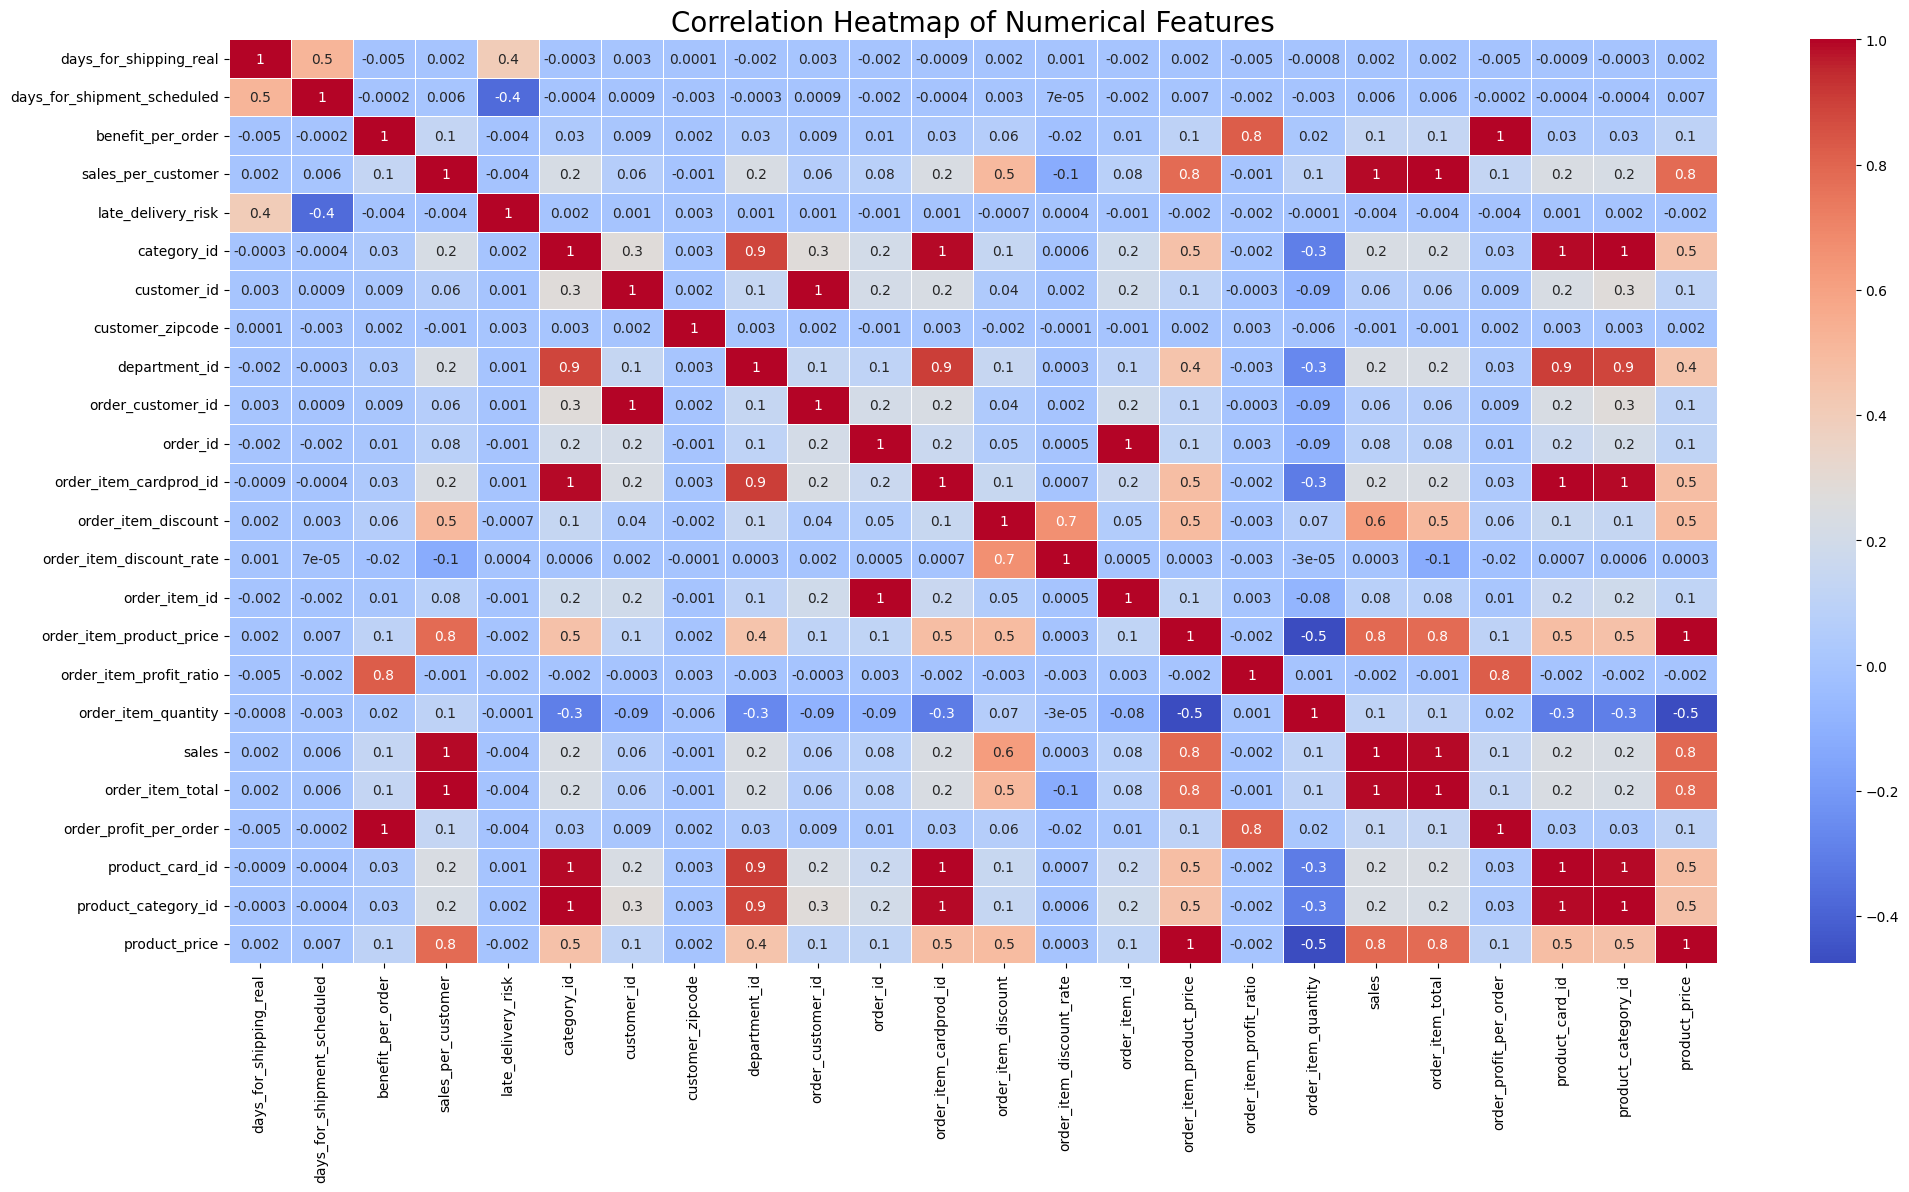

In [24]:
#fig, ax = plt.subplots(figsize=(24,12))         # figsize
#sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(numeric_df.corr(),
            annot=True,
            linewidths=.5,
            fmt='.1g',
            cmap='coolwarm',
            ax=ax)

plt.title("Correlation Heatmap of Numerical Features", fontsize=20)
plt.show()

We can observe that product price price has high correlation with Sales,Order Item Total.

**Strong Positive Correlations (High Red Blocks)**

*  Sales, Sales per customer, Order Item Total, Order Profit per order, Benefit
per order, Product Price. These variables are highly correlated (~0.8–1.0), *essentially measuring the same thing.*

Example: Sales ≈ Order Item Total, and both align with Product Price.

*  Keeping all may cause multicollinearity → need dimensionality reduction or feature selection.

*  Category Id, Department Id, Product Card Id, Product Category Id have very strong correlation (~0.9+). These are hierarchical identifiers → only one should be retained (others are redundant).

**Strong Negative Correlations (High Blue Blocks)**

*  Order Item Quantity vs Product Price (~ –0.5). As price increases, order quantity decreases → intuitive demand relationship. This is useful as a predictor (could keep both).

*  Late_delivery_risk vs Days for shipment (scheduled) (~ –0.4). Longer scheduled days = lower late risk (makes sense: more time reduces late deliveries).

**Weak / Redundant Features**

*  Customer Id, Order Id, Order Item Id, Product Card Id are identifiers, not predictive hence should be dropped.

*  Zip Code, City, State, Full Name have very high cardinality and are not meaningful without aggregation hence candidates for dropping.

As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales? It can be found by using groupby method which will segregate similar market regions together and add all sales for that particular region using 'sum' function.

<Axes: title={'center': 'Total sales for all regions'}, xlabel='order_region'>

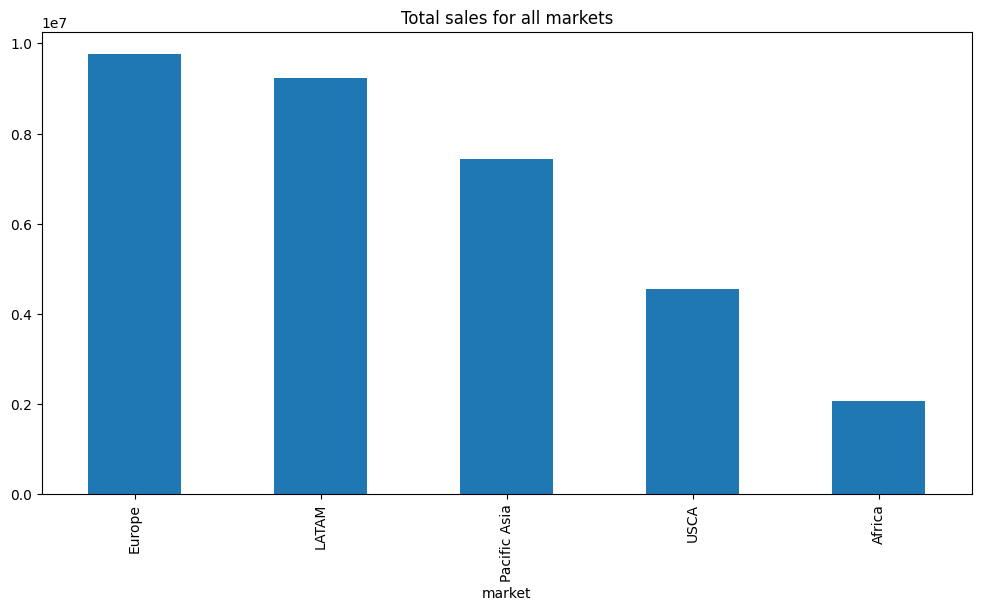

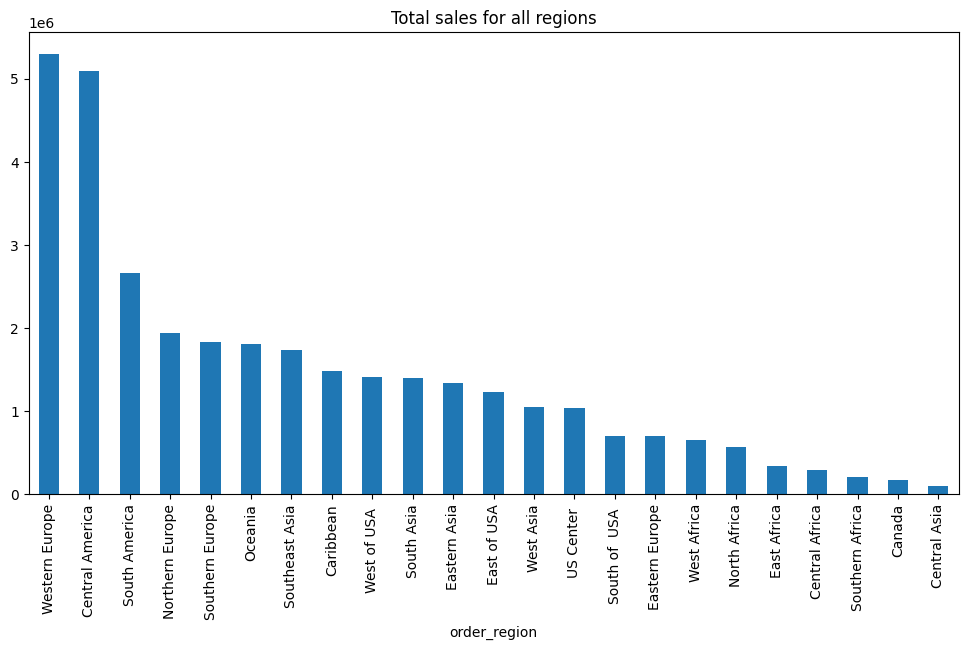

In [25]:
market = df.groupby('market') #Grouping by market
region = df.groupby('order_region')
plt.figure(1)
market['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

It could be seen from the graph that European market has the most number of sales whereas Africa has the least.In these markets western europe regions and central america recorded highest sales.

Which catergory of products has highest sales?The same method can be followed here to see the product category with highest sales

<Axes: title={'center': 'Average price'}, xlabel='category_name'>

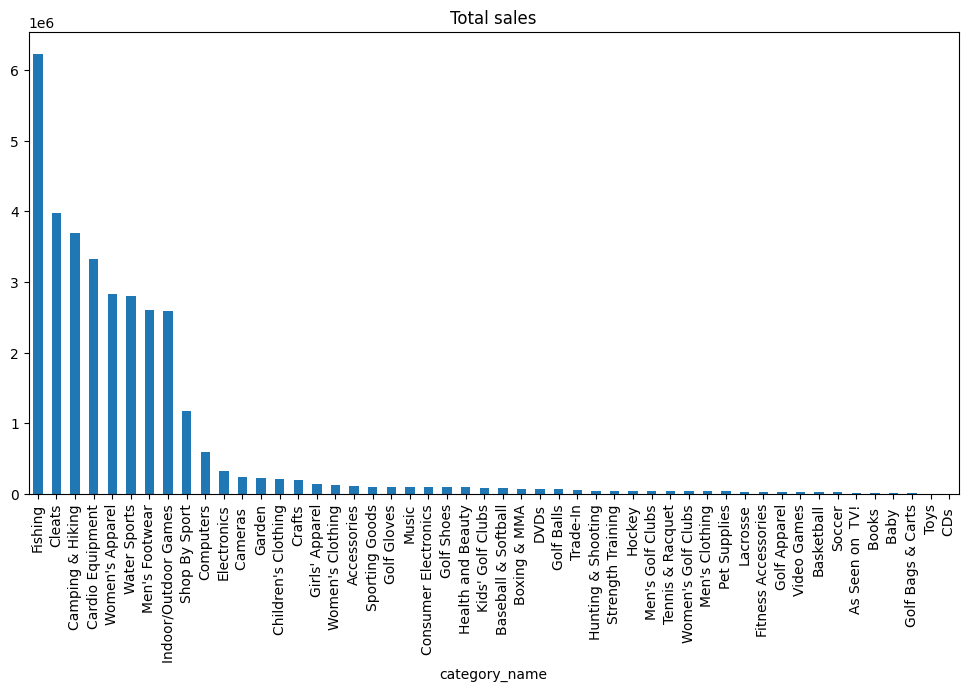

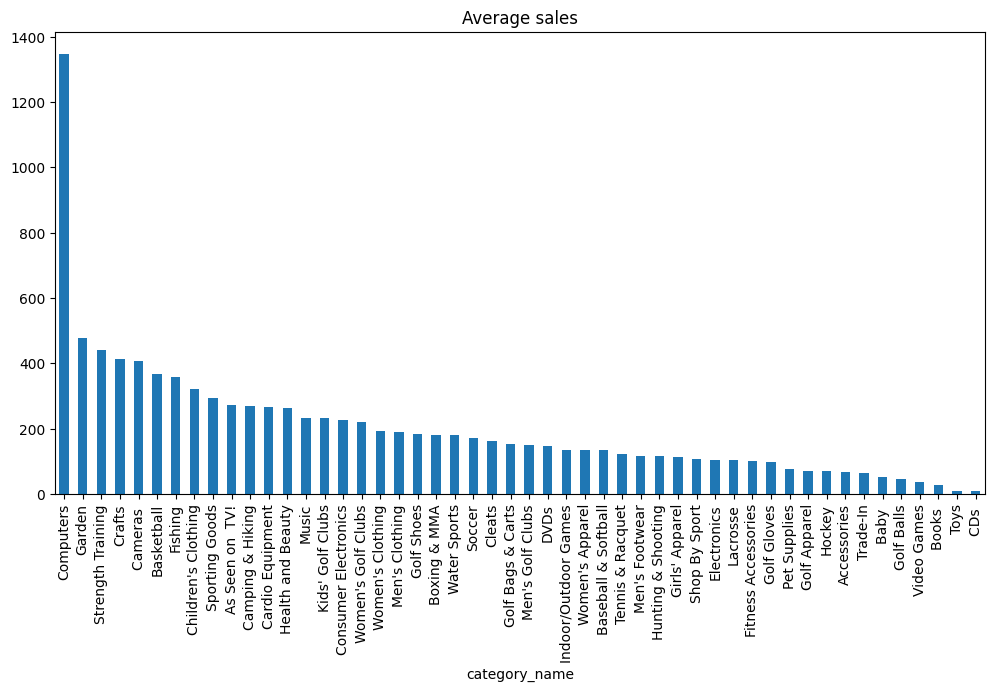

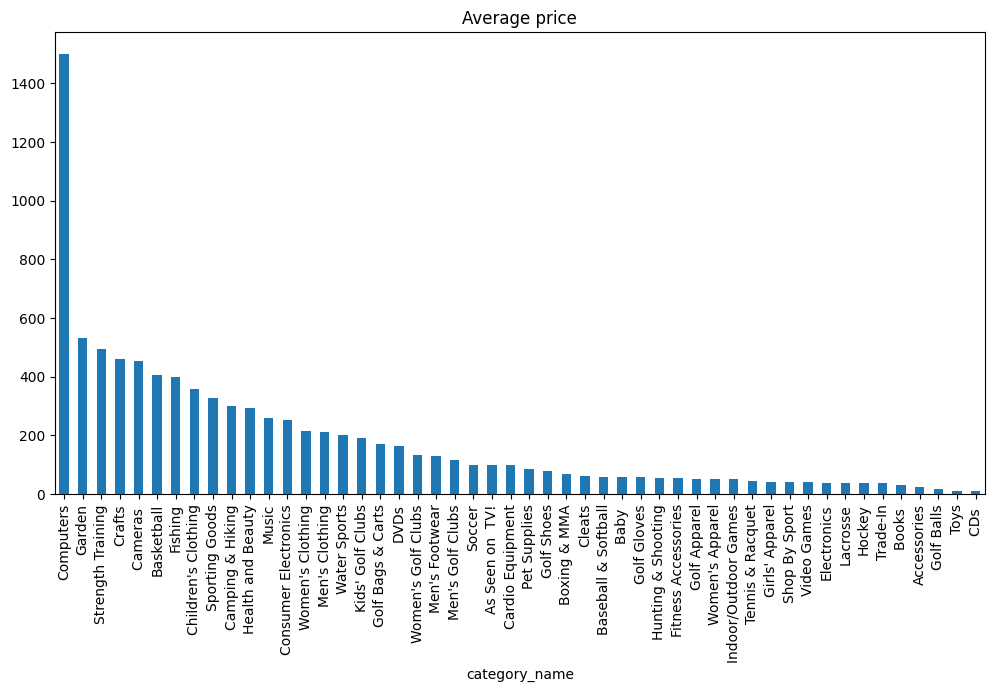

In [26]:
#Grouping all categories
cat = df.groupby('category_name')
plt.figure(1)
# Total sum of sales for all categories
cat['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(2)
cat['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
# Mean prices for all categories
cat['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")





As we can see from fig 1 that the fishing category had most number of sales followed by the Cleats.However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$. Since correlation was high between Price and Sales it will be intresting to see how price is impacting the sales for all the products to see the trend.

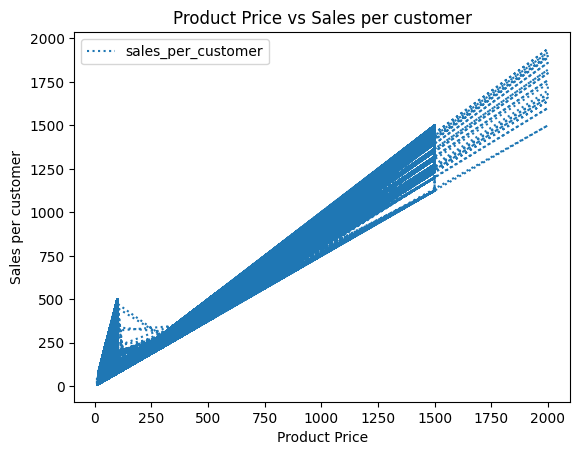

In [27]:
df.plot(x='product_price', y='sales_per_customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12)
plt.title('Product Price vs Sales per customer')#title
plt.xlabel('Product Price')  # X-axis title
plt.ylabel('Sales per customer') # Y=axis title
plt.show()

It can be observed that prices has linear relation with sales. Which quarter recorded highest sales? It can be found by dividing order time into years,months,week day,hour to better observe the trend.

In [28]:
df['order_year']= pd.DatetimeIndex(df['order_date_dateorders']).year
df['order_month'] = pd.DatetimeIndex(df['order_date_dateorders']).month
df['order_week_day'] = pd.DatetimeIndex(df['order_date_dateorders']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order_date_dateorders']).hour
df['order_month_year'] = pd.to_datetime(df['order_date_dateorders']).dt.to_period('M')

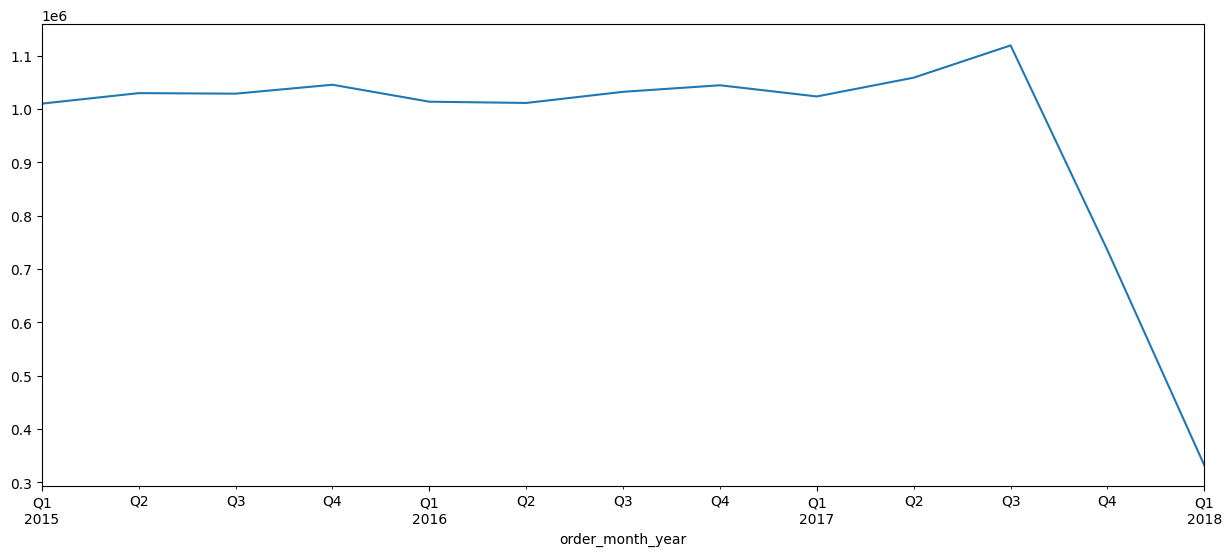

In [29]:
quater= df.groupby('order_month_year')
quartersales=quater['sales'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. What is the purchase trend in week days,hours and months?

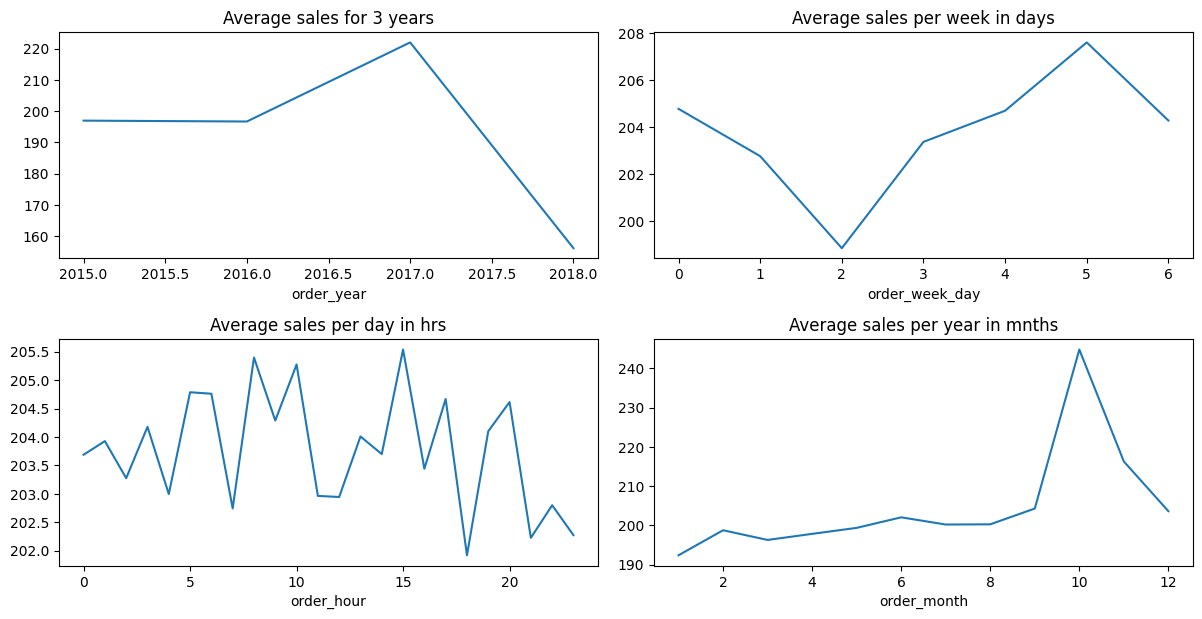

In [30]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= df.groupby('order_year')
quater['sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=df.groupby("order_week_day")
days['sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=df.groupby("order_hour")
hrs['sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=df.groupby("order_month")
mnth['sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

How price is impacting sales, when and which products are having more sales are found.The most number of orders came in October followed by November, and orders for all other months are consistent.Highest number of orders are placed by customers in 2017. Saturday recorded highest number of average sales and wednesday with the least number of sales. The average sales are consistent throughout the day irrespective of time with std of 3.

It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [31]:
df['type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

It is found that four types of payment methods are used.Which payment method is preferred the most by people in different regions?

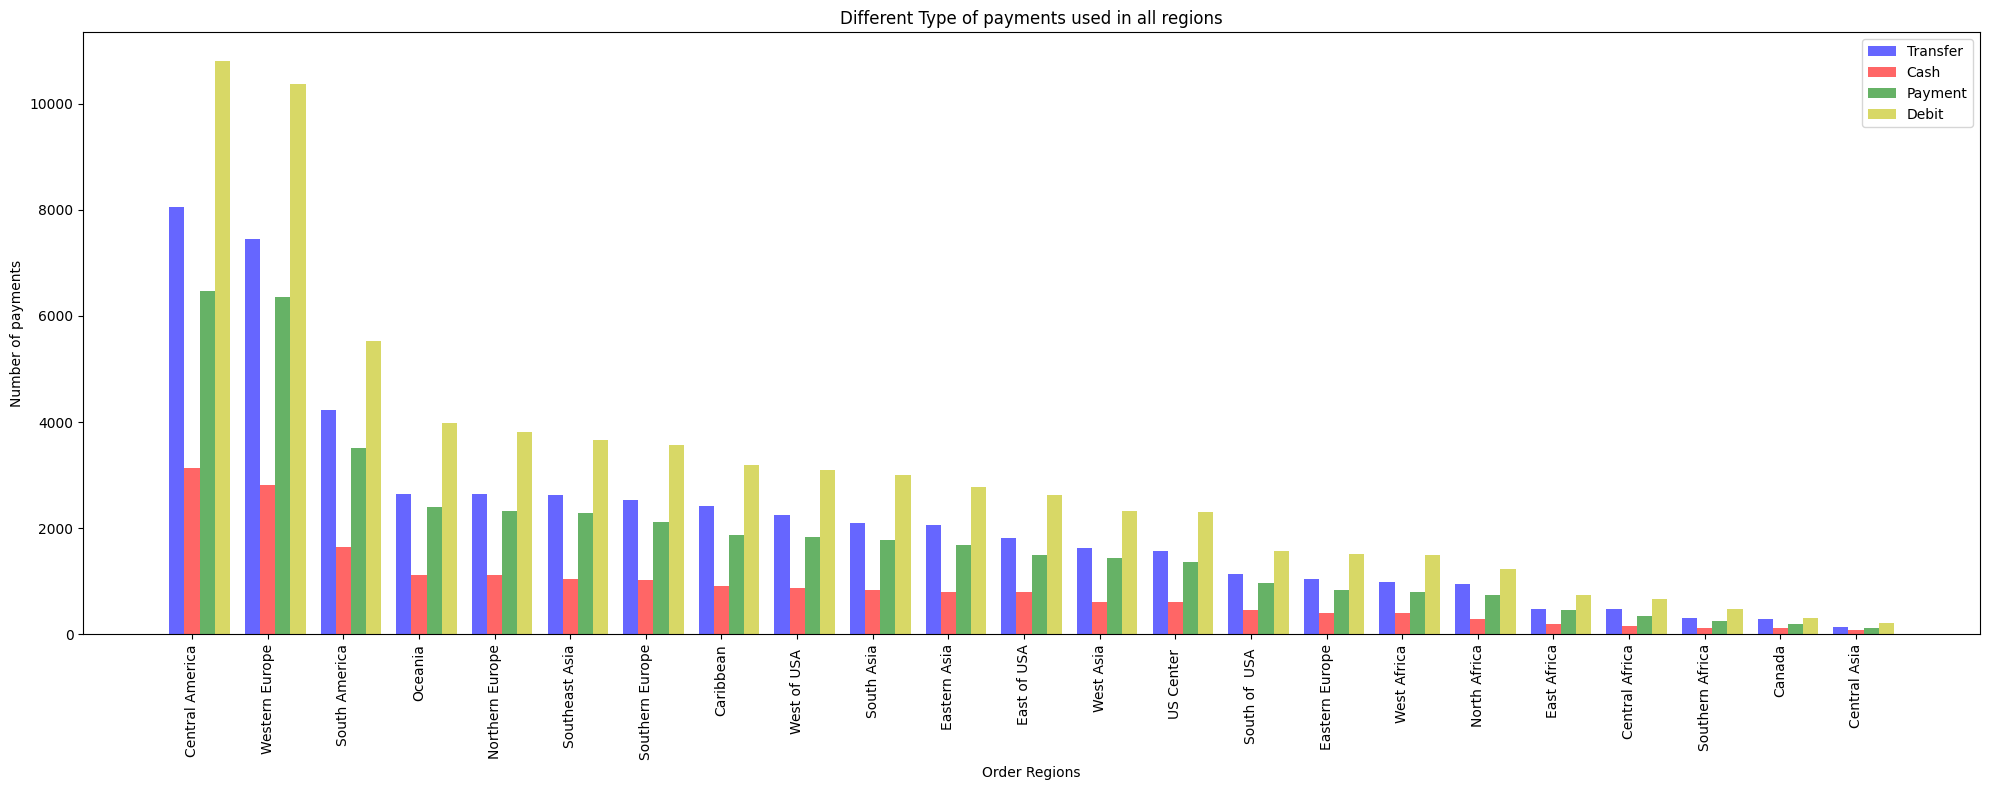

In [32]:
#xyz = df.groupby('Type')
xyz1 = df[(df['type'] == 'TRANSFER')]
xyz2= df[(df['type'] == 'CASH')]
xyz3= df[(df['type'] == 'PAYMENT')]
xyz4= df[(df['type'] == 'DEBIT')]
count1=xyz1['order_region'].value_counts()
count2=xyz2['order_region'].value_counts()
count3=xyz3['order_region'].value_counts()
count4=xyz4['order_region'].value_counts()
names=df['order_region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()


Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.Some products are having negative benefit per orders which indicates that the orders are generating loss of revenue to the company. Which products are these?

Total revenue lost with orders -3883547.345768667


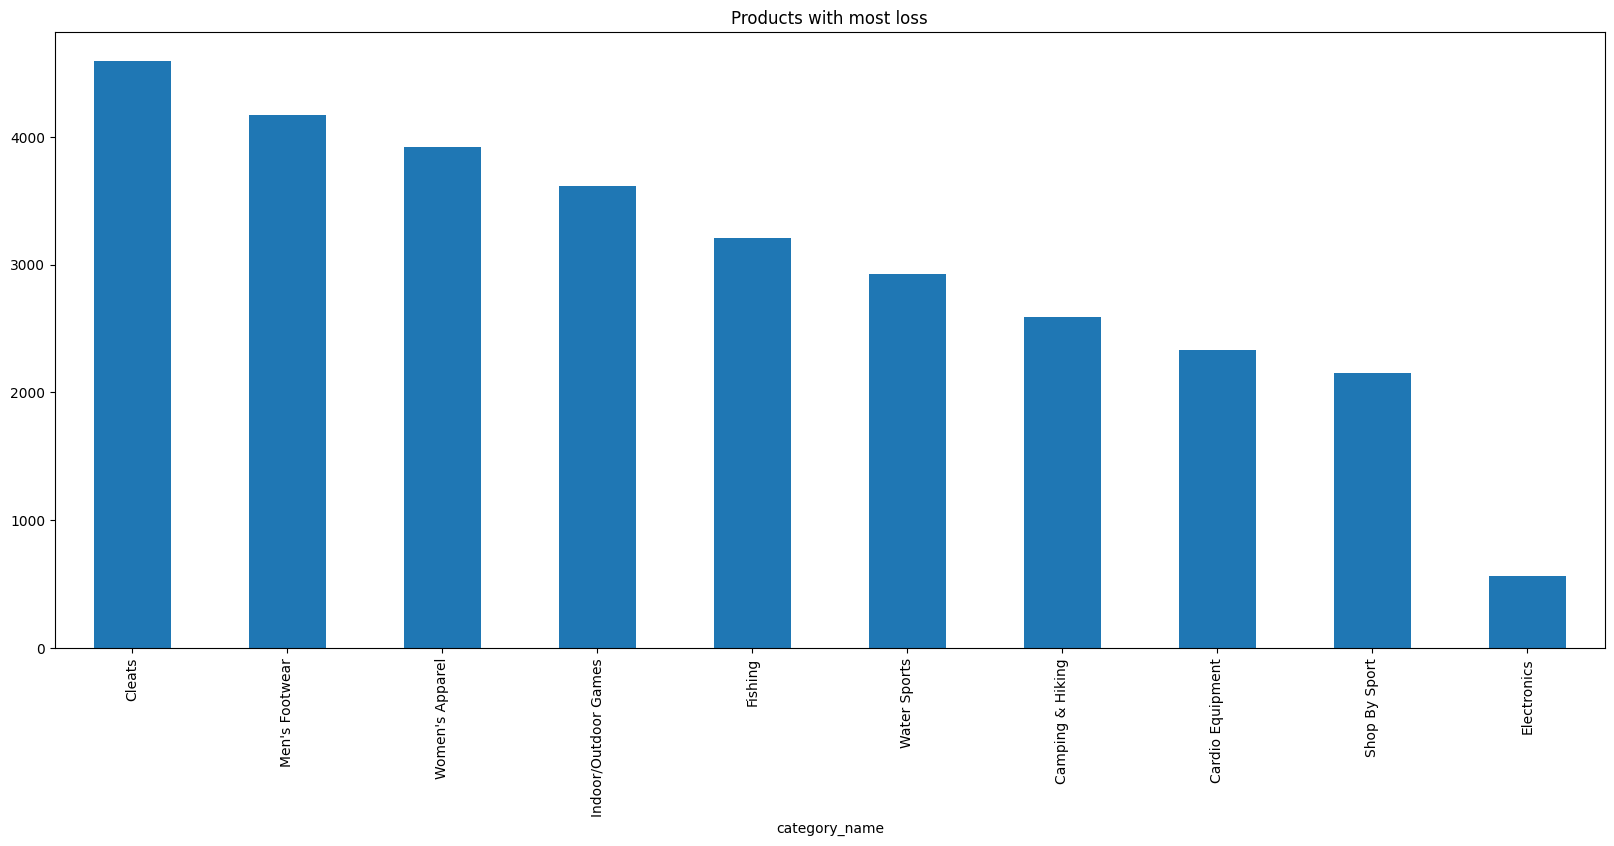

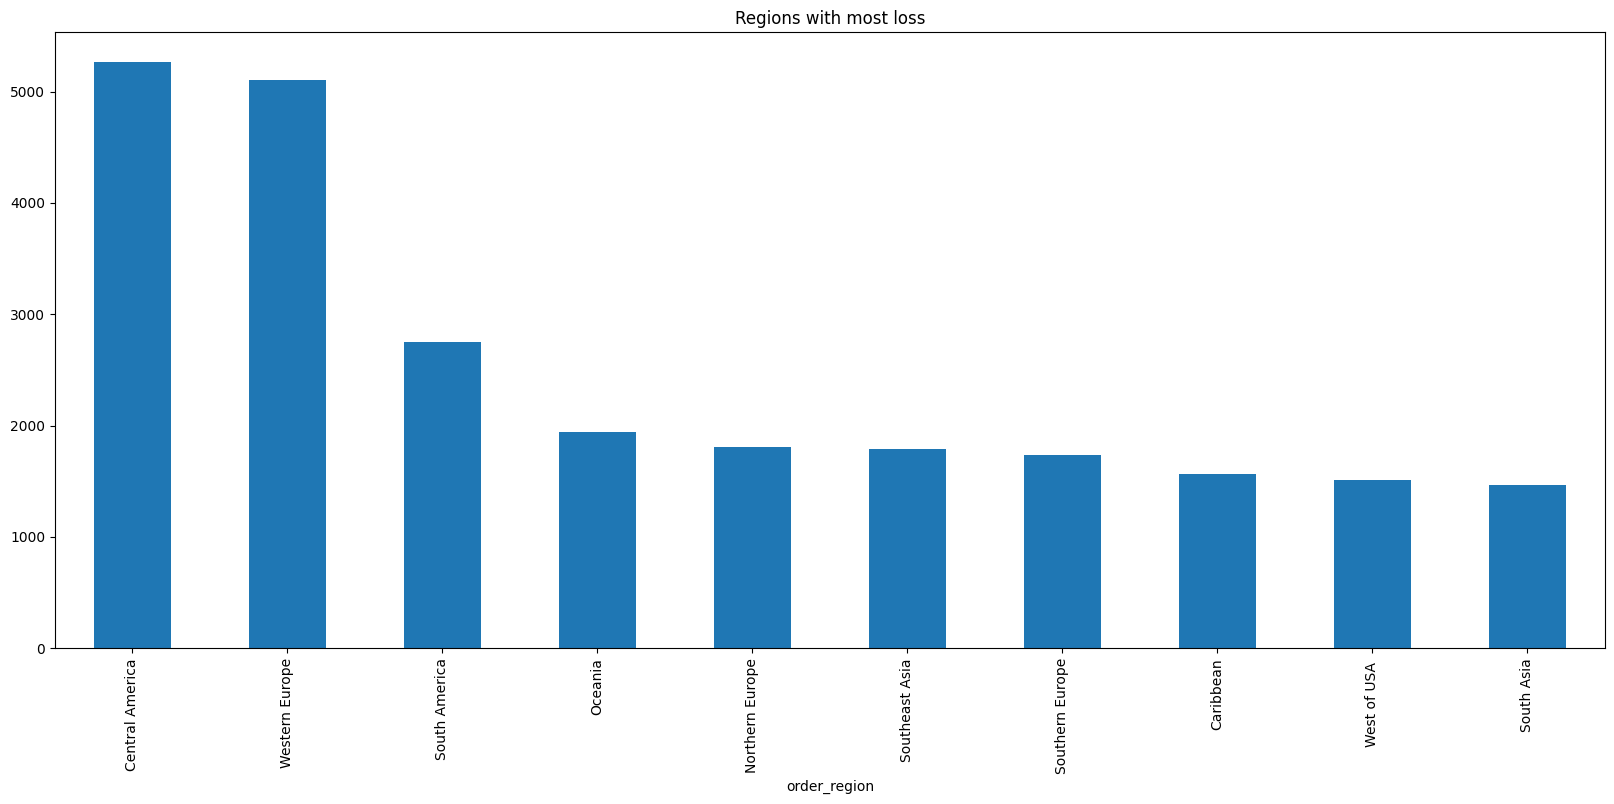

In [33]:
loss = df[(df['benefit_per_order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['benefit_per_order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happeing in central america and western europe region.This lost sales may have happened due to suspected frauds or late deliveries.

Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future


In [34]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = df[(df['type'] != 'TRANSFER')&(df['order_status'] == 'SUSPECTED_FRAUD')]
xyz['order_region'].value_counts()

,count
order_region,


It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer probably from abroad. Which region and what product is being suspected to the fraud the most?

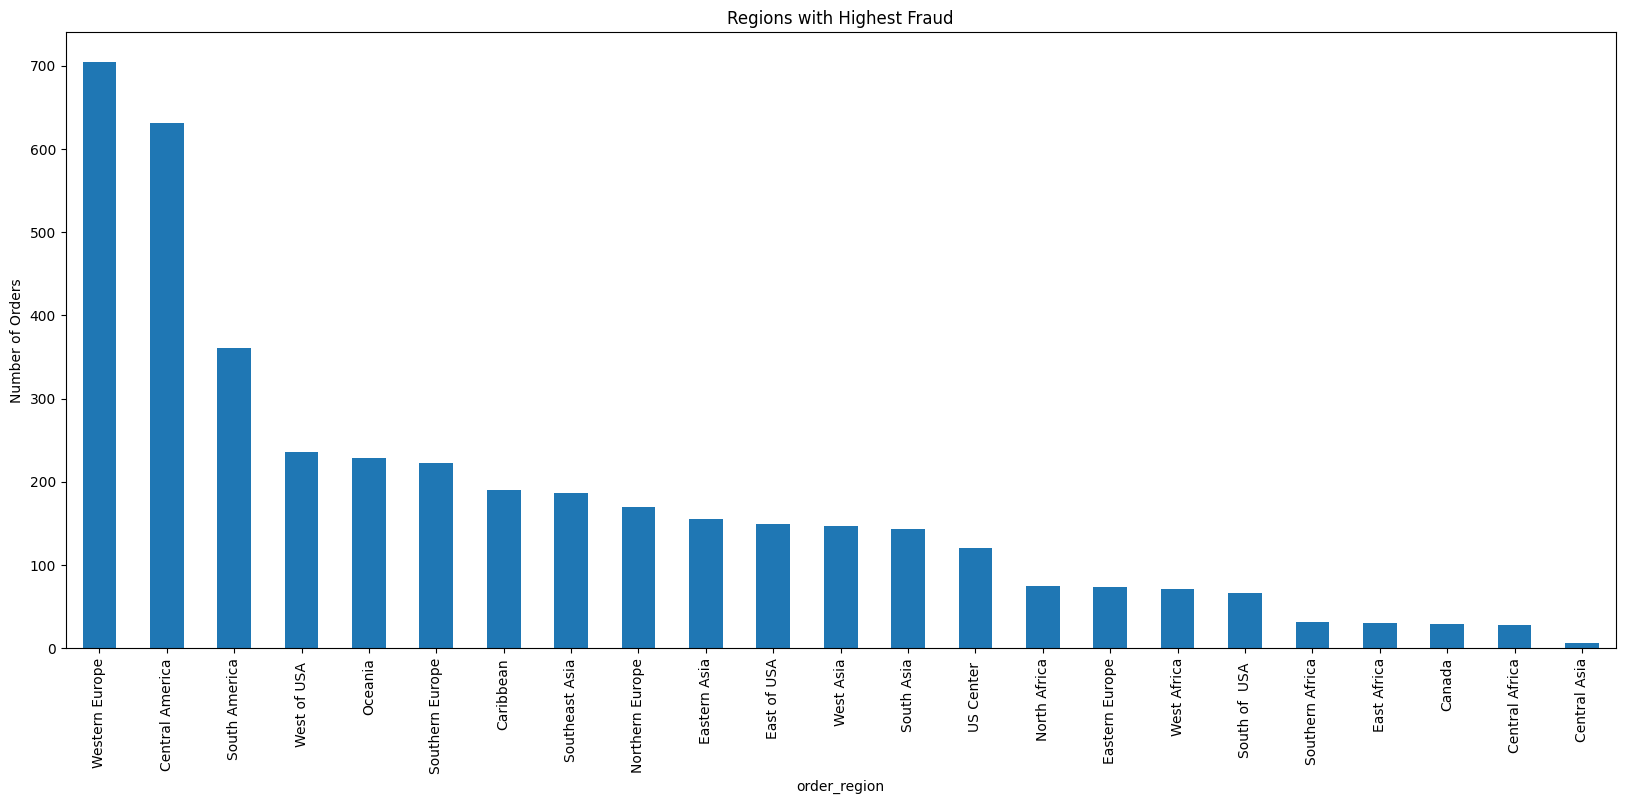

In [35]:
high_fraud = df[(df['order_status'] == 'SUSPECTED_FRAUD') & (df['type'] == 'TRANSFER')]#separating orders with suspected fraud
# Plotting bar chart with respect to order region
high_fraud['order_region'].value_counts().plot.bar(figsize=(20,8), title="Regions with Highest Fraud")
plt.xlabel("order_region")
plt.ylabel("Number of Orders")
plt.show()

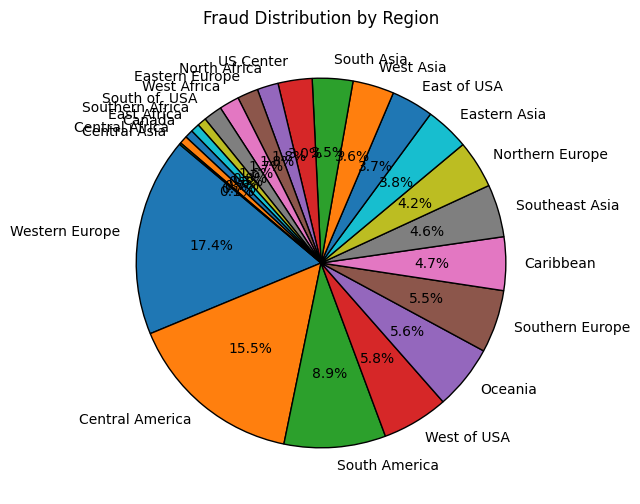

In [36]:
# 1. Filter the dataset for suspected fraud orders where type is TRANSFER
high_fraud = df[(df['order_status'] == 'SUSPECTED_FRAUD') & (df['type'] == 'TRANSFER')]

# 2. Count the number of fraud cases by region
fraud_counts = high_fraud['order_region'].value_counts()

# 3. Plot a pie chart
plt.figure(figsize=(10, 6))   # set chart size
plt.pie(
    fraud_counts,
    labels=fraud_counts.index,   # region names
    autopct='%1.1f%%',           # show percentages
    startangle=140,              # rotate start angle for better view
    wedgeprops={'edgecolor':'black'}  # add borders for clarity
)

plt.title("Fraud Distribution by Region")
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?


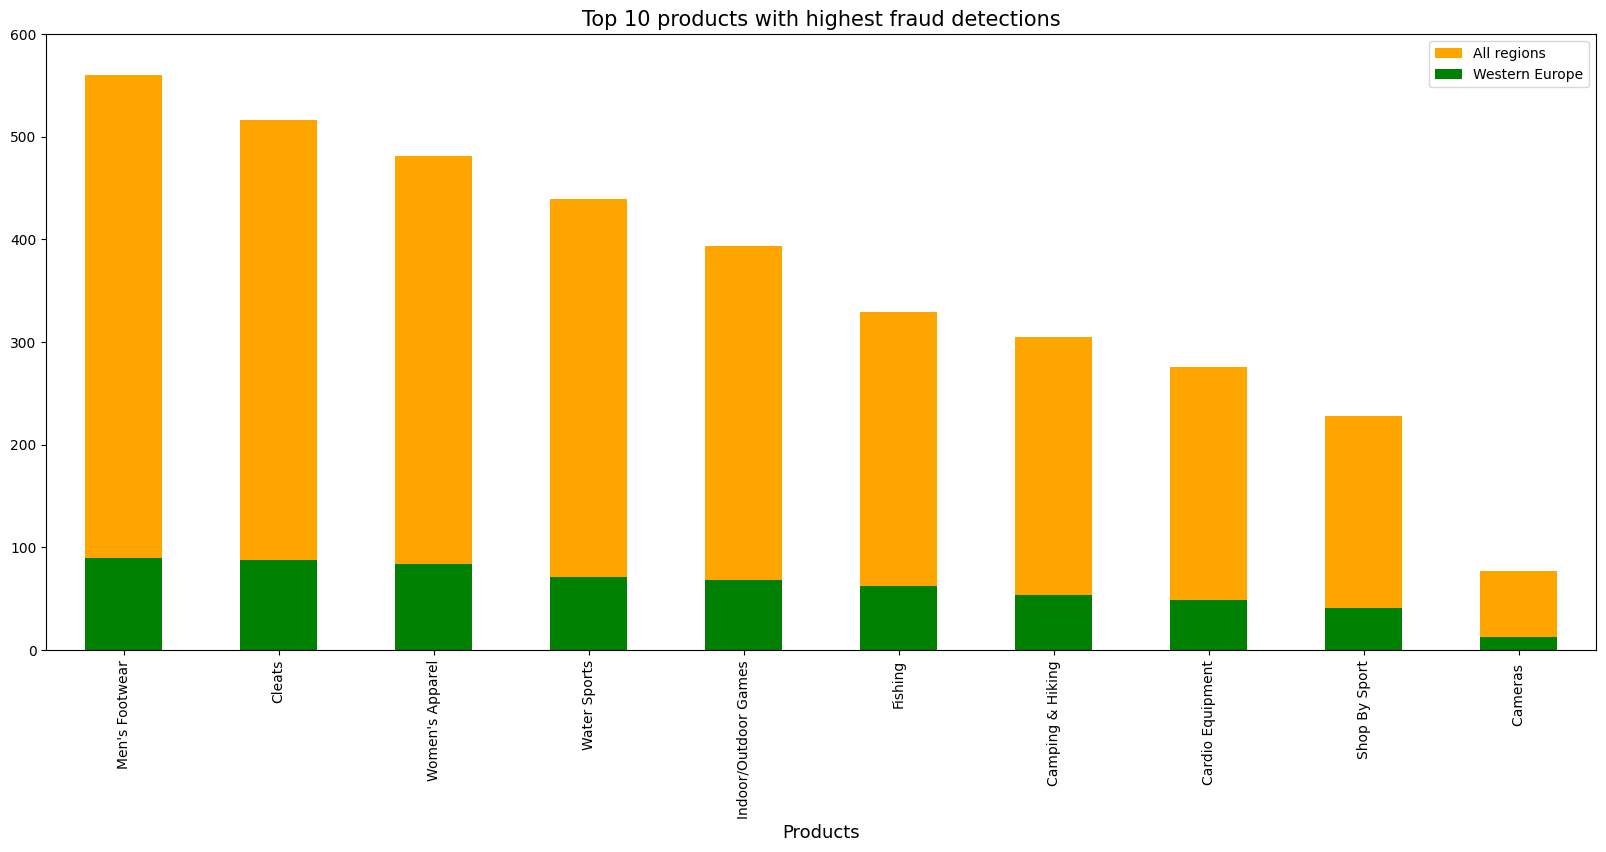

In [37]:
# Filter the dataframe to include only rows where 'Order Status' is 'SUSPECTED_FRAUD'and store it in a new dataframe called high_fraud1
high_fraud1 = df[(df['order_status'] == 'SUSPECTED_FRAUD')] #

# Filter the dataframe further to include only rows where 'Order Status' is 'SUSPECTED_FRAUD'
# and 'Order Region' is 'Western Europe', storing it in high_fraud2
high_fraud2 = df[(df['order_status'] == 'SUSPECTED_FRAUD') &(df['order_region'] == 'Western Europe')]

# Create a bar plot for the top 10 most frequent 'Category Name' in the high_fraud1 dataframe (all regions)
# Use orange bars and set the title of the plot
fraud1=high_fraud1['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')

# Create a bar plot for the top 10 most frequent 'Category Name' in the high_fraud2 dataframe (Western Europe)
# Use green bars and set the title of the plot
fraud2=high_fraud2['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')

# Add a legend to the plot to distinguish between "All regions" and "Western Europe" bars
plt.legend(["All regions", "Western Europe"])

# Set the main title of the entire plot
plt.title("Top 10 products with highest fraud detections", size=15)

# Set the label for the x-axis
plt.xlabel("Products", size=13)

# Set the limits for the y-axis, from 0 to 600
plt.ylim(0,600)

# Display the plot
plt.show()

It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.Which customers are conducting all these fraud?

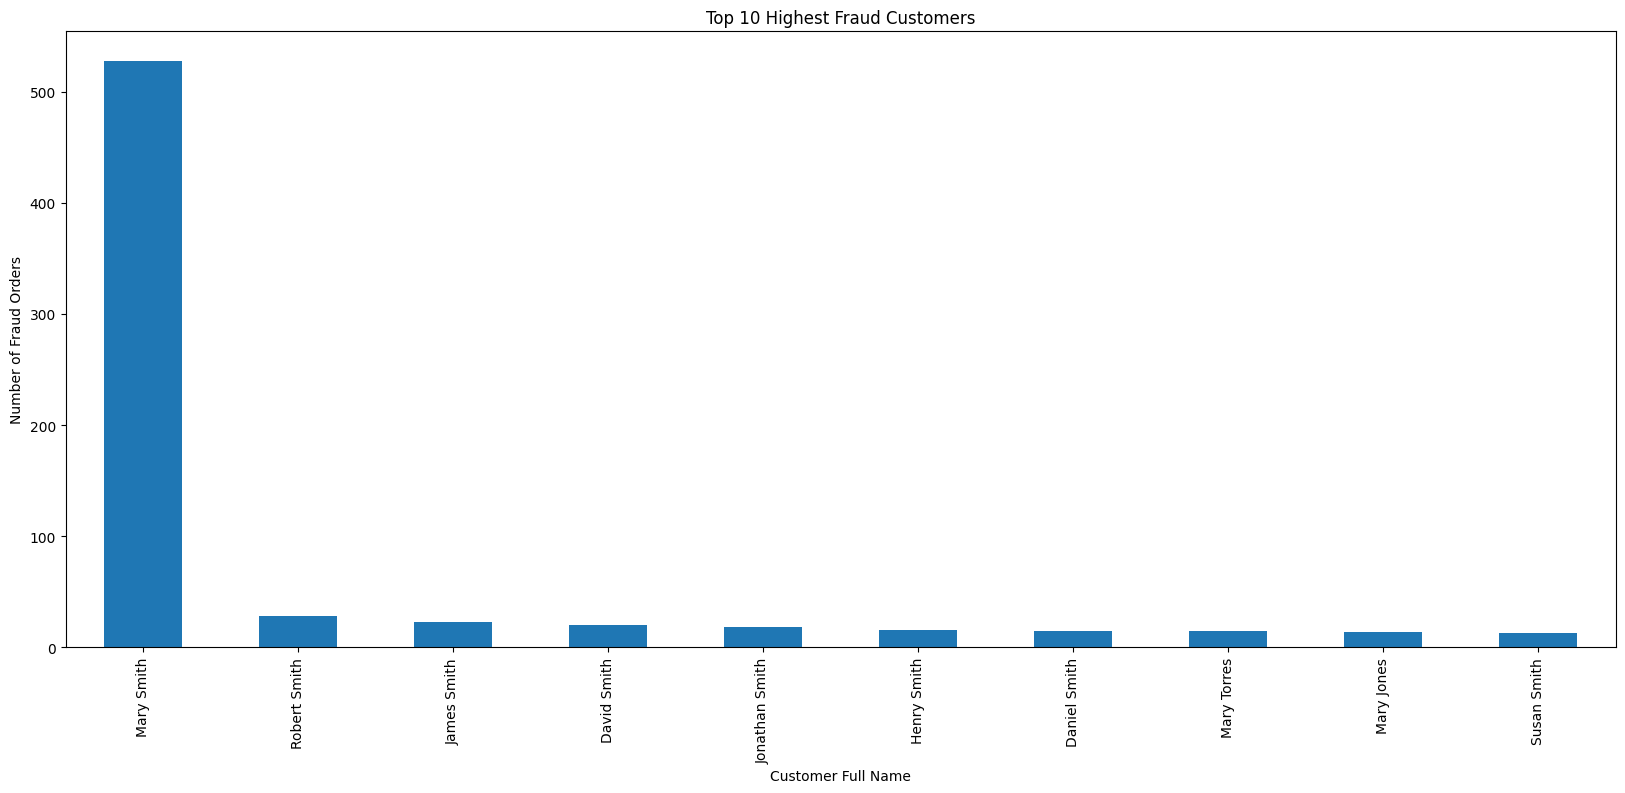

In [38]:
#Filtering out suspected fruad orders
cus = df[(df['order_status'] == 'SUSPECTED_FRAUD')]
#Top 10 customers with most fraud
cus['customer_full_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")
plt.xlabel("Customer Full Name") # Add x-axis label
plt.ylabel("Number of Fraud Orders") # Add y-axis label
plt.show() # Display the plot

The customer named Mary Smith alone was responible for trying to conduct fraud 528 times which is very shocking .How much amount exactly did she conduct fraud orders?

In [39]:
#Filtering orders of mary smith with suspected fraud
# Correcting the customer's full name to include a space
amount = df[(df['customer_full_name'] == 'Mary Smith')&(df['order_status'] == 'SUSPECTED_FRAUD')]
#Plotting bar chart for top 10 most suspected fraud customers
total_fraud_sales_mary_smith = amount['sales'].sum()

# Print the total amount of fraud sales by Mary Smith
print(f"Total sales amount for suspected fraud orders by Mary Smith: {total_fraud_sales_mary_smith:.2f}")

Total sales amount for suspected fraud orders by Mary Smith: 102491.66


The total amount was almost 102k which is very huge amount.Since Mary was using different address every time when placing orders, a new customer id was issued each time which makes it difficult to identify the customer and ban them. All these parameters should be taken into consideration to improve fraud detection algorithm so fraud can be identified more accurately.

Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. What category of products are being delivered late the most?

<Axes: title={'center': 'Top 10 products with most late deliveries'}, xlabel='category_name'>

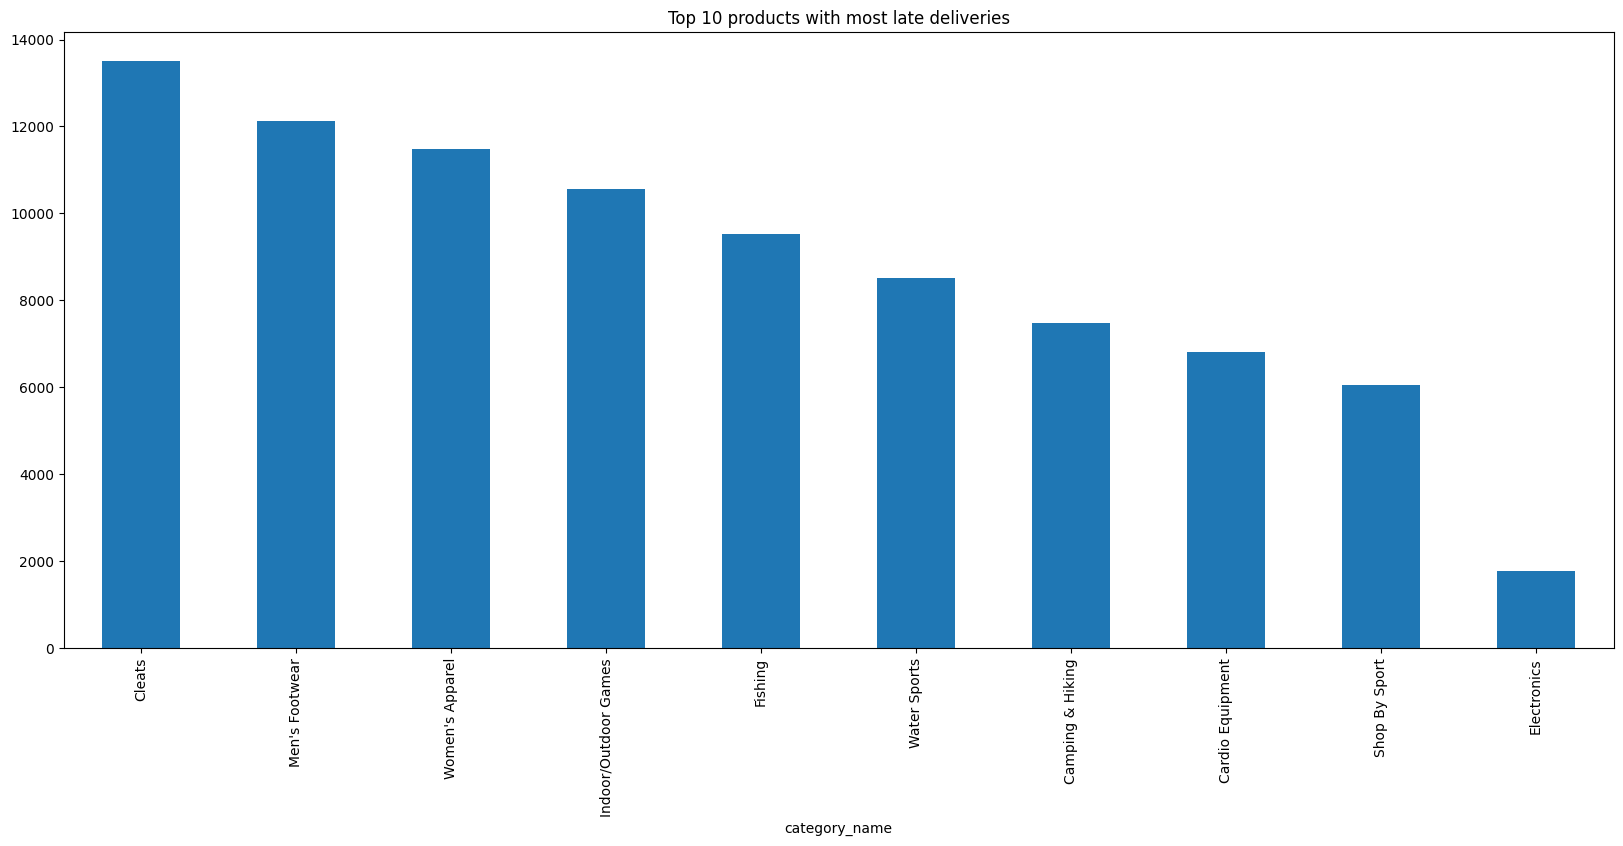

In [40]:
#Filtering columns with late delivery status
late_delivery = df[(df['delivery_status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")


It can be seen that orders with Cleats department is getting delayed the most followed by Men's Footwear.For some orders risk of late delivery is given in data.The products with late delivery risk are compared with late delivered products.

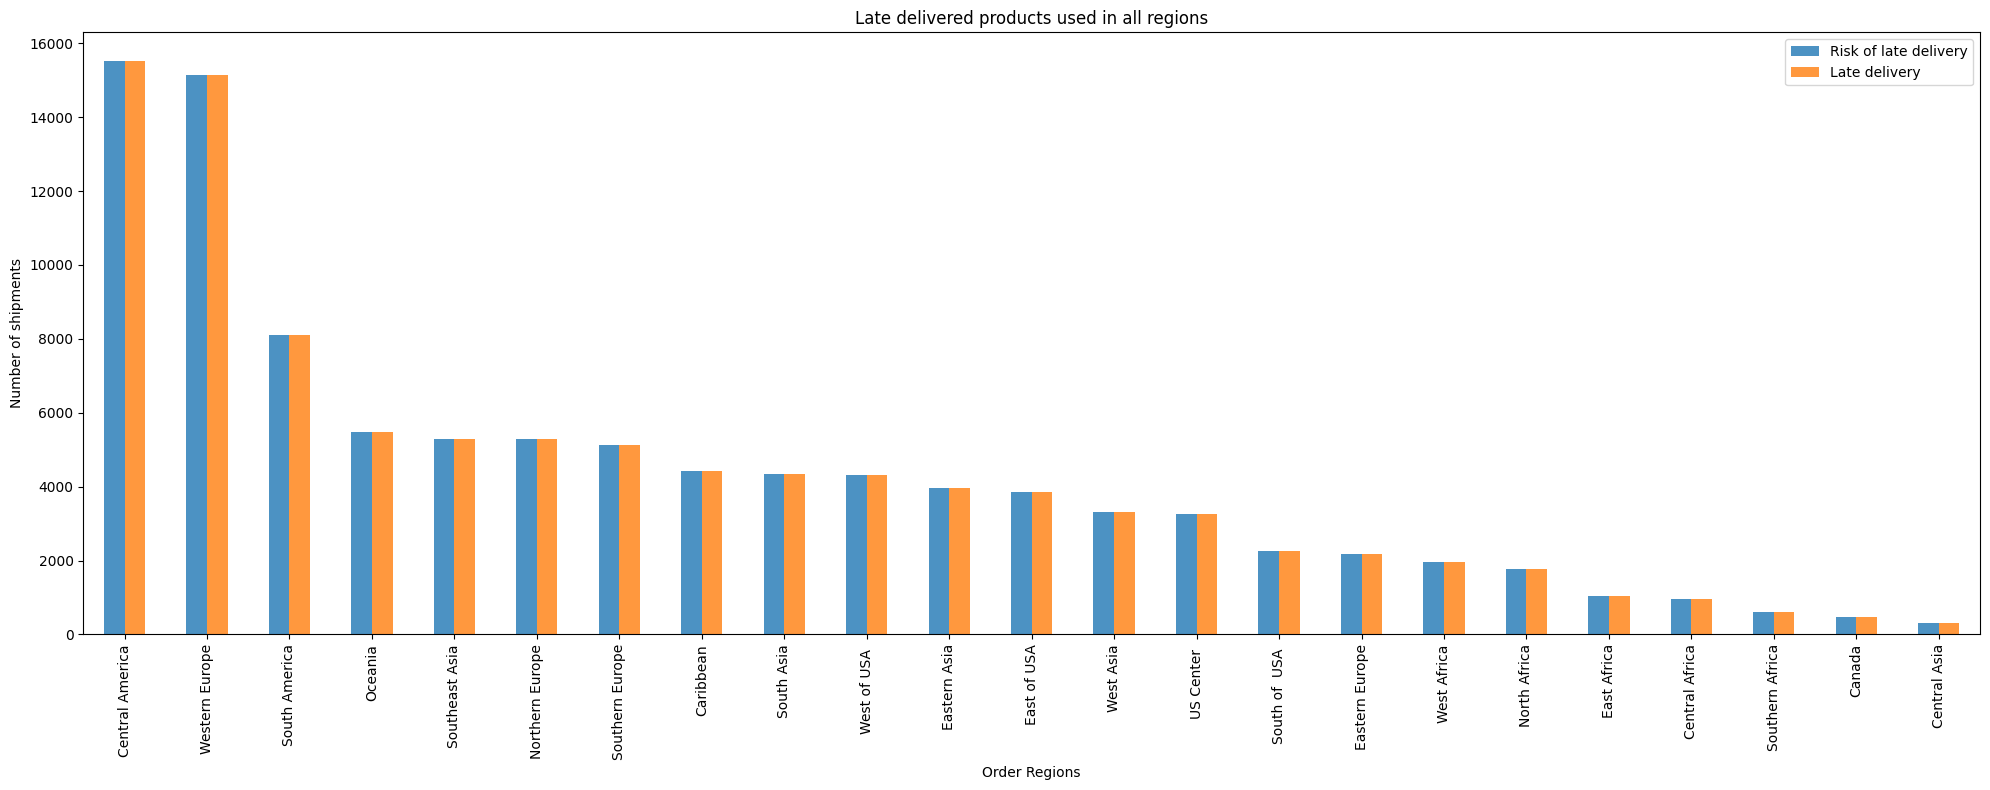

In [41]:
# Count the occurrences of each order region for orders with late delivery risk and late delivered orders
count1 = df[df['late_delivery_risk'] == 1]['order_region'].value_counts()
count2 = df[df['delivery_status'] == 'Late delivery']['order_region'].value_counts()

# Combine the counts into a single dataframe for easier plotting
late_delivery_counts = pd.DataFrame({'Risk of late delivery': count1, 'Late delivery': count2}).fillna(0)

# Plot the bar chart using pandas plot function
late_delivery_counts.plot(kind='bar', figsize=(20,8), alpha=0.8)
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them. It will be interesting to see the number of late deliveried orders for different types of shipment method in all regions.

**TARGET**

In [42]:
TARGET = "late_delivery_risk"
assert TARGET in df.columns, f"{TARGET} not found in columns!"
y = df[TARGET].astype(int)

Numeric cols: 28
Categorical cols: 20


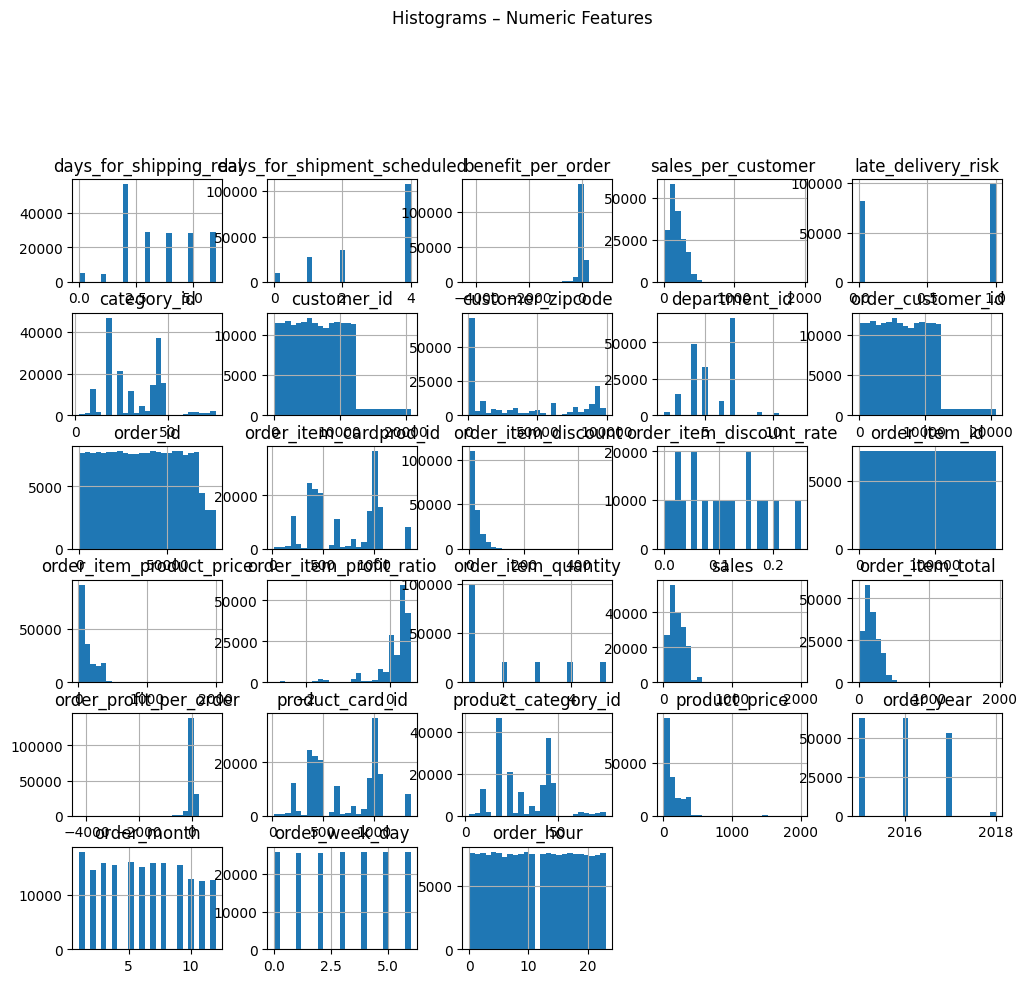

Target balance (y):
late_delivery_risk
1   0.55
0   0.45
Name: proportion, dtype: float64


In [44]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))

# Histograms for a few numeric columns
_ = df[num_cols].hist(bins=25, figsize=(12, 10))
plt.suptitle("Histograms – Numeric Features", y=1.05)
plt.show()

# Target balance
print("Target balance (y):")
print(y.value_counts(normalize=True).round(3))

**Observations from Histograms (Numeric Features)**

*  Days for Shipping (real) & Days for Shipment (scheduled):
      *  Most orders take 2–5 days to ship.
      *  Sometimes scheduled days are shorter than real shipping days → this could lead to delays.

*  Benefit per Order (Profit):
      *  Most orders make a small to medium profit (between 0–100).
      *  A few orders have very high profits, while some even show negative profits (losses).

*  Sales per Customer:
      *  Most customers spend 100–250 per order.
      *  A few customers spend a lot more (up to nearly 2000).

*  Order Item Quantity:
      *  Most customers order 1–3 items at a time.

*  Discounts:
      *  Discounts are usually small, but a few orders have very high discounts.

*  Product Price & Sales:
      *  Most products cost between 10–200.
      *  A few very expensive products go up to 2000, and these lead to higher sales values.

**Target Balance (Late Delivery Risk)**

*  55% of orders are late deliveries.
*  45% are delivered on time.

This means the target variable (late_delivery_risk) is fairly balanced — not perfect, but not extremely skewed. We don’t need heavy rebalancing for the model (maybe just test SMOTE or class weights).

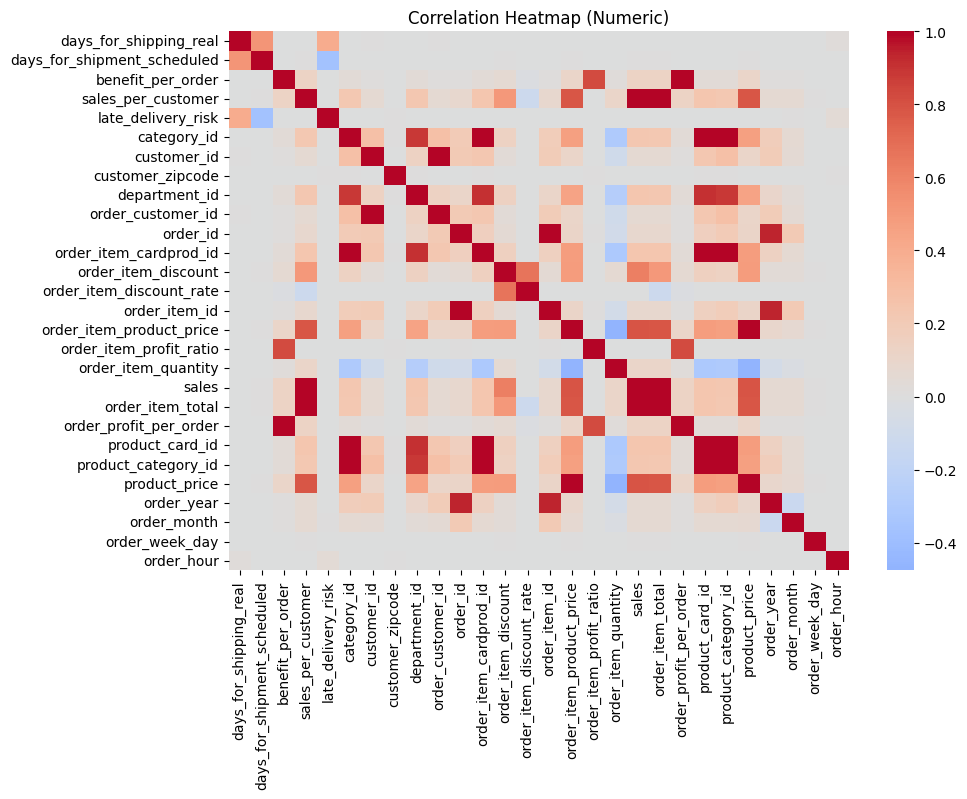

In [45]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric)")
plt.show()

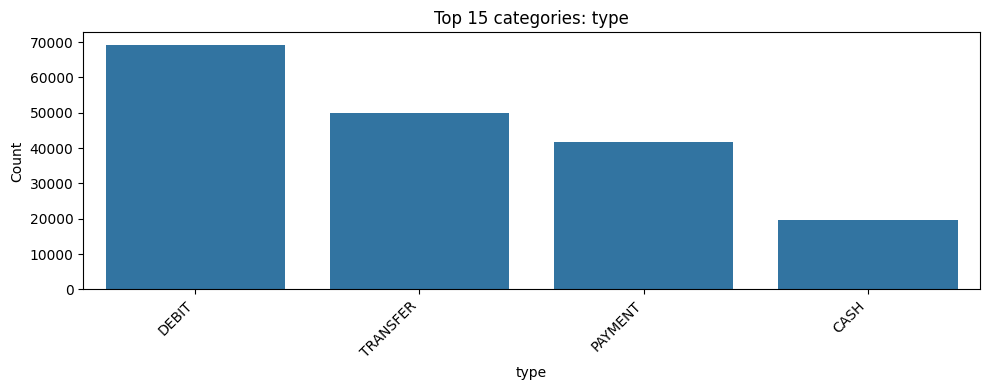

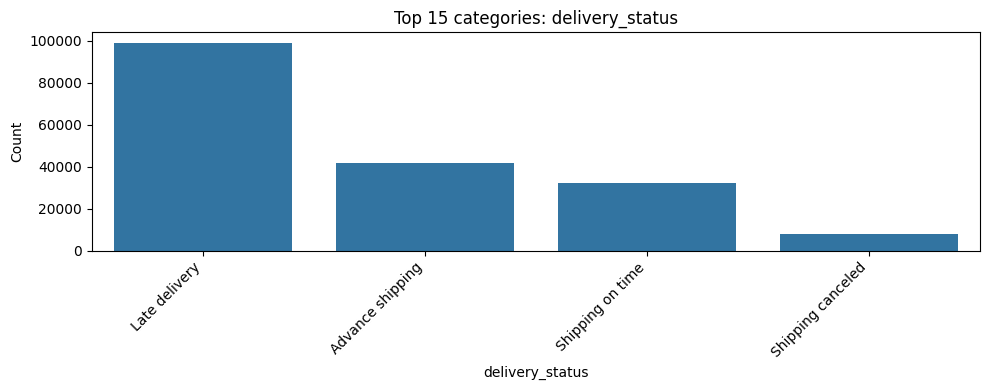

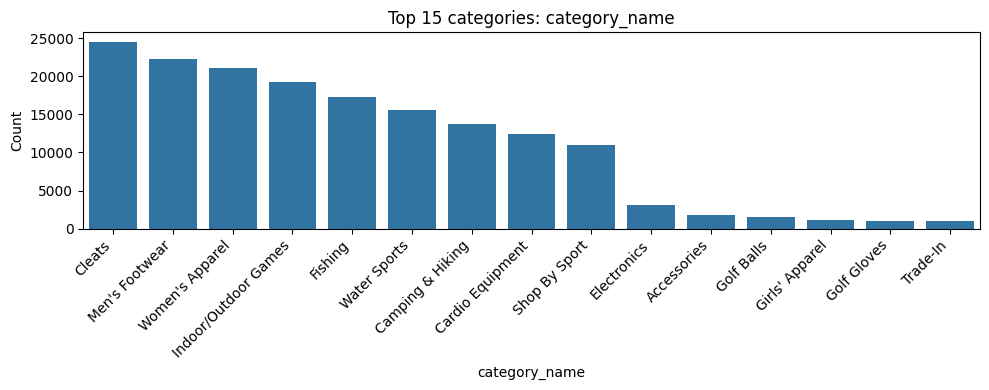

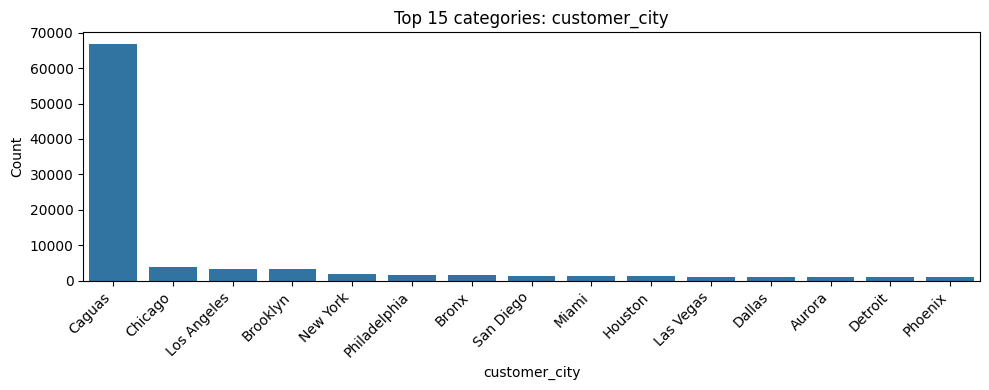

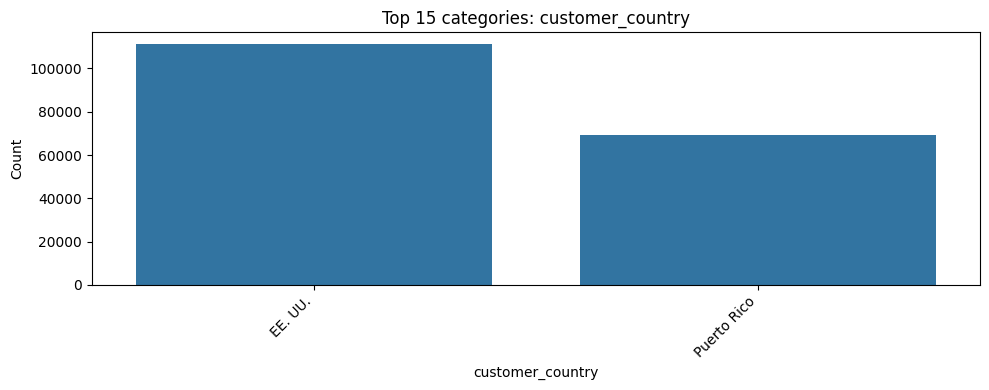

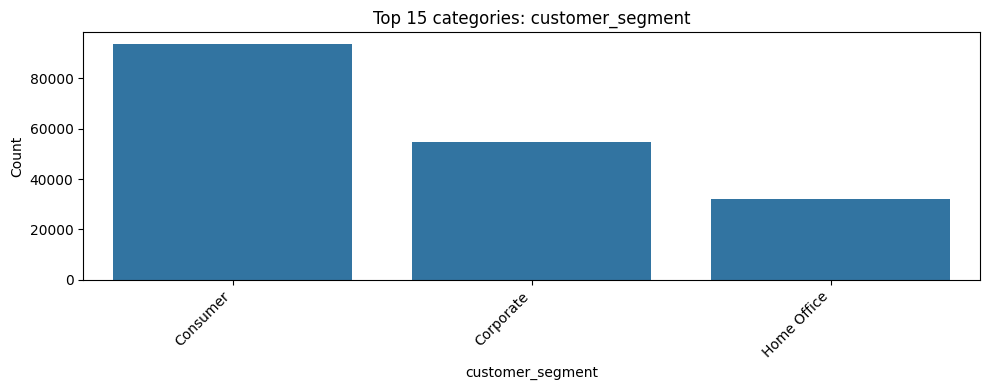

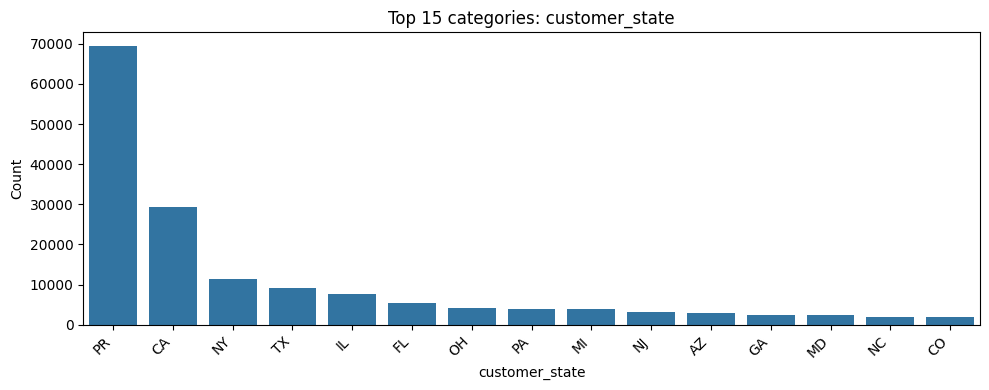

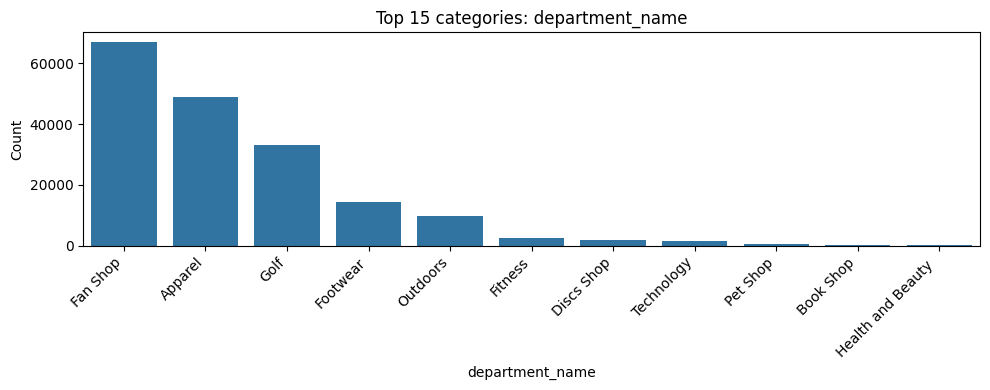

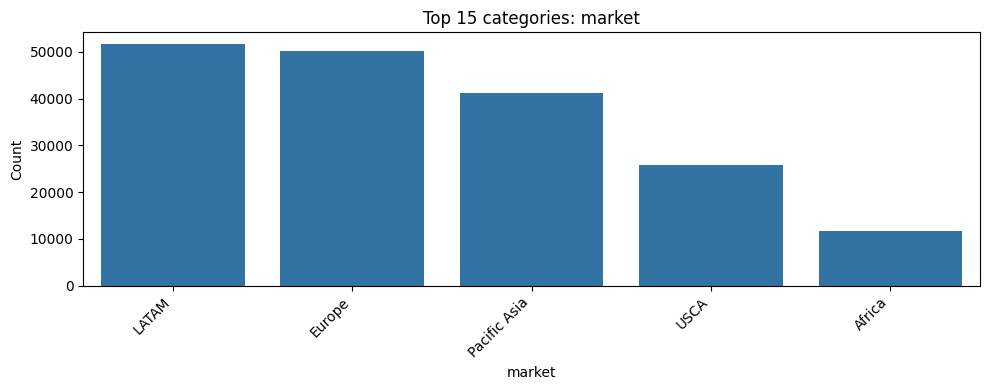

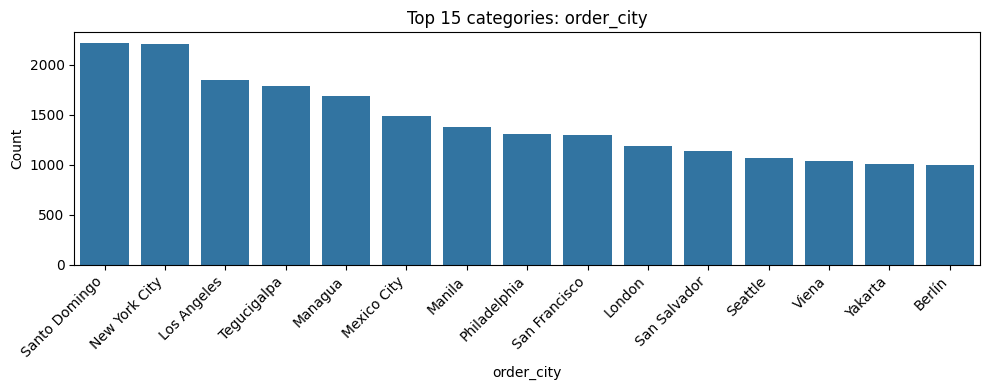

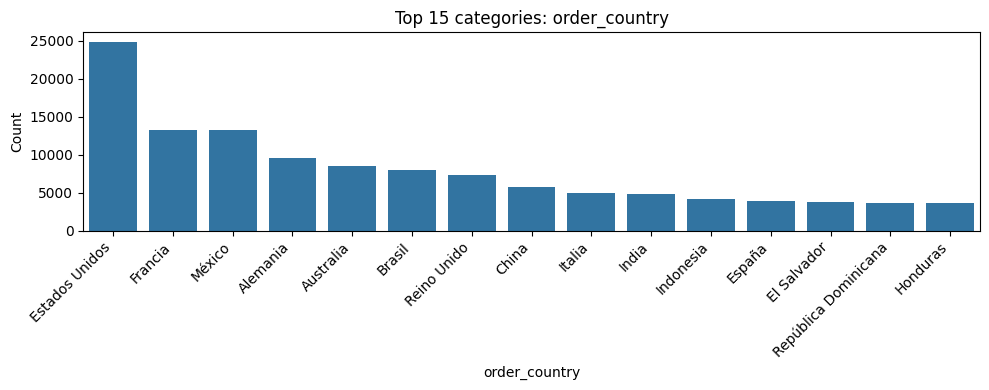

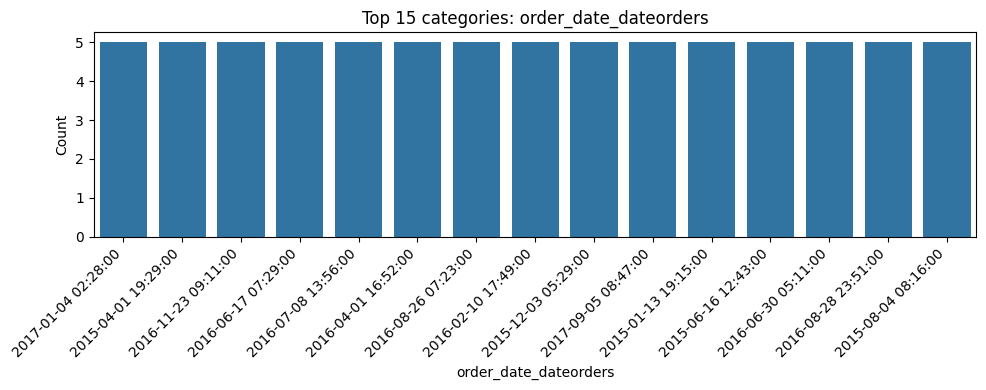

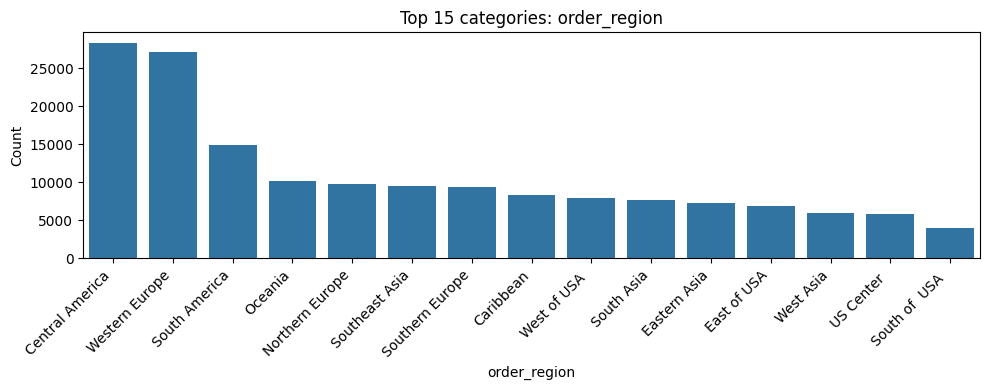

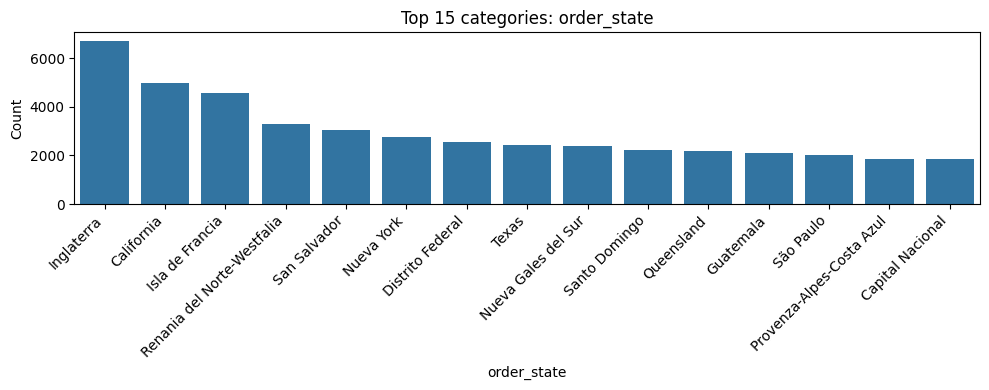

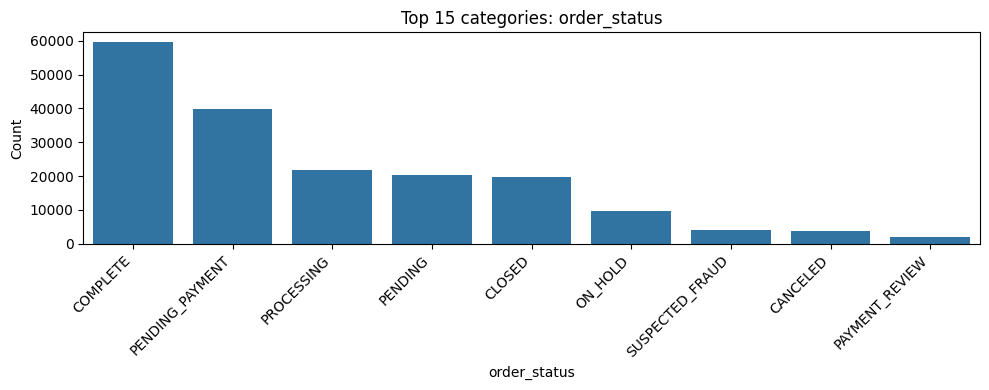

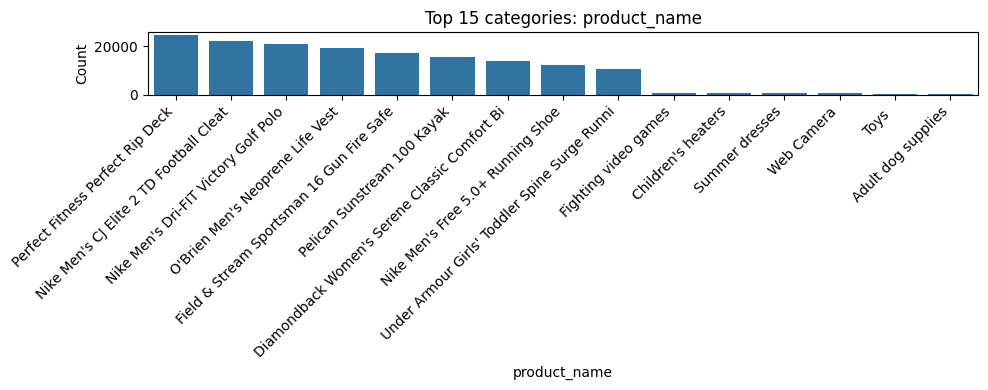

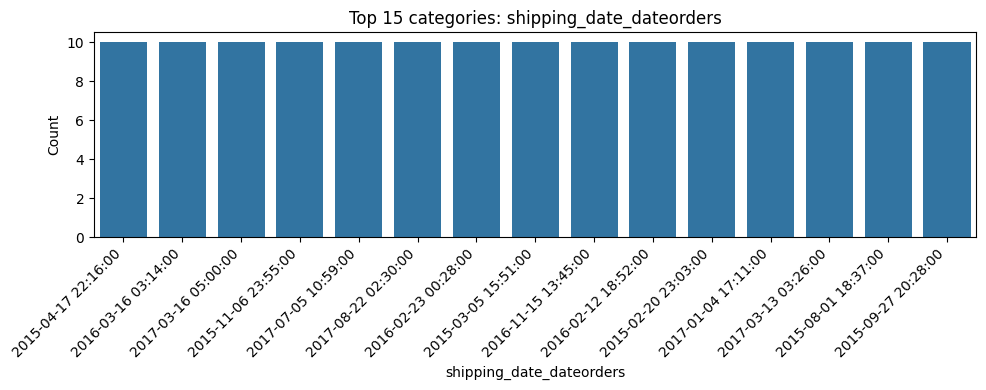

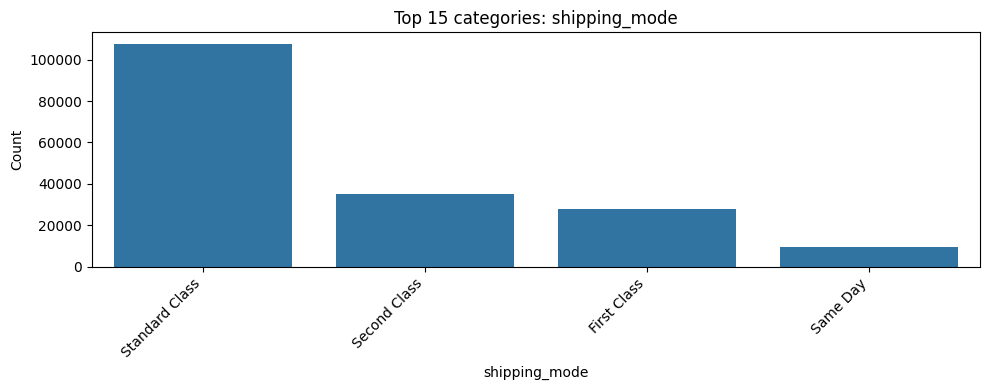

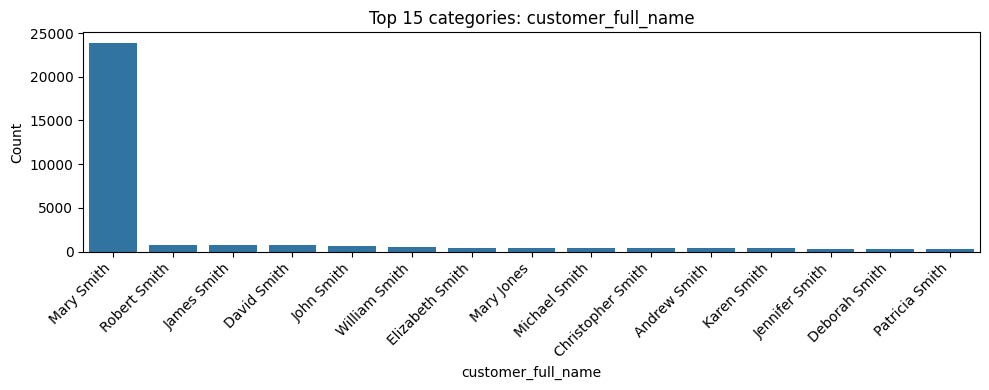

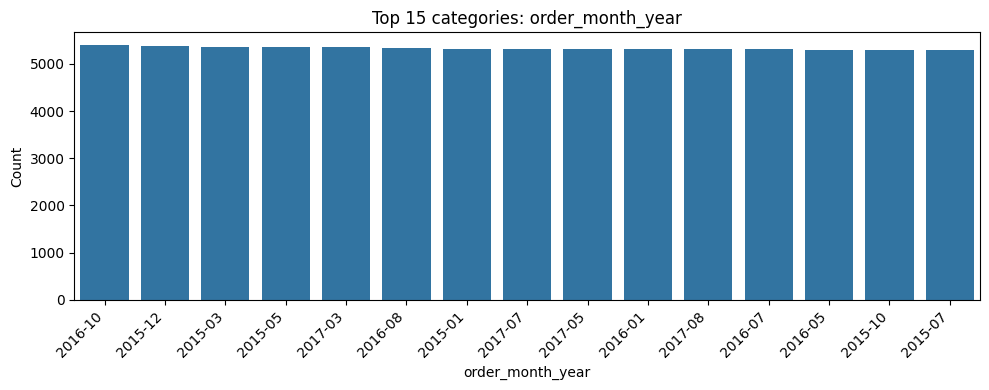

In [ ]:
def plot_univariate_categorical(d, cat_cols, top_n=15):
    for col in cat_cols:
        if col not in d.columns:
            continue
        vc = d[col].value_counts(dropna=False)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=vc.head(top_n).index.astype(str),
                    y=vc.head(top_n).values)
        plt.title(f"Top {top_n} categories: {col}")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

plot_univariate_categorical(df, cat_cols, top_n=15)


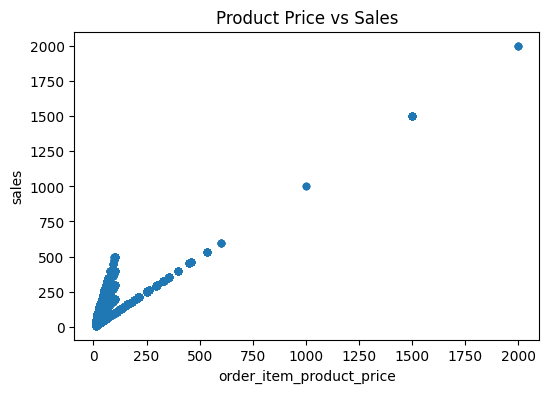

In [46]:
if {"order_item_product_price","sales"}.issubset(df.columns):
    df.plot(kind="scatter", x="order_item_product_price", y="sales", alpha=0.4, figsize=(6,4))
    plt.title("Product Price vs Sales")
    plt.show()

# Train / Test **split**

To measure the performance of different models the machine learning models are trained to detect fraud,late delivery for classification type. And sales, order quantity is predicted for regression type models.

A new dataset is created with the copy of original data for training the data and validation.

In [47]:
train_df=df.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better to predict if an order is fraudulent or will be delivered late.

In [49]:
train_df['fraud'] = np.where(train_df['order_status'] == 'SUSPECTED_FRAUD', 1, 0)
train_df['late_delivery']=np.where(train_df['delivery_status'] == 'Late delivery', 1, 0)

In [50]:
#quick check
train_df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,shipping_date_dateorders,shipping_mode,customer_full_name,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late_delivery
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,...,2018-02-03 22:56:00,Standard Class,Cally Holloway,2018,1,2,22,2018-01,0,0
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,...,2018-01-18 12:27:00,Standard Class,Irene Luna,2018,1,5,12,2018-01,0,1
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,...,2018-01-17 12:06:00,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,0,0
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,...,2018-01-16 11:45:00,Standard Class,Tana Tate,2018,1,5,11,2018-01,0,0
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,...,2018-01-15 11:24:00,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,0,0


In [51]:
train_df.dtypes

,0
type,object
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,object
late_delivery_risk,int64
category_id,int64
category_name,object
customer_city,object


There are some columns with object type data which cannot be trained in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.

In [55]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()

# Identify columns with object data types
object_cols = train_df.select_dtypes(include=['object']).columns

# Convert the categorical columns into numeric using LabelEncoder
for col in object_cols:
    train_df[col] = le.fit_transform(train_df[col])

#display the initial records
display(train_df.head())

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,shipping_date_dateorders,shipping_mode,customer_full_name,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late_delivery
0,1,3,4,91.25,314.64,0,0,73,40,66,...,2018-02-03 22:56:00,3,1876,2018,1,2,22,2018-01,0,0
1,3,5,4,-249.09,311.36,1,1,73,40,66,...,2018-01-18 12:27:00,3,5378,2018,1,5,12,2018-01,0,1
2,0,4,4,-247.78,309.72,3,0,73,40,452,...,2018-01-17 12:06:00,3,4429,2018,1,5,12,2018-01,0,0
3,1,3,4,22.86,304.81,0,0,73,40,285,...,2018-01-16 11:45:00,3,12929,2018,1,5,11,2018-01,0,0
4,2,2,4,134.21,298.25,0,0,73,40,66,...,2018-01-15 11:24:00,3,10638,2018,1,5,11,2018-01,0,0


Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late.

In [57]:
train_df.dtypes

,0
type,int64
days_for_shipping_real,int64
days_for_shipment_scheduled,int64
benefit_per_order,float64
sales_per_customer,float64
delivery_status,int64
late_delivery_risk,int64
category_id,int64
category_name,int64
customer_city,int64


In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['customer_country']  = le.fit_transform(train_data['customer_country'])
train_data['market']            = le.fit_transform(train_data['market'])
train_data['type']              = le.fit_transform(train_data['type'])
train_data['product_name']      = le.fit_transform(train_data['product_name'])
train_data['customer_segment']  = le.fit_transform(train_data['customer_segment'])
train_data['customer__state']    = le.fit_transform(train_data['customer_state'])
train_data['order_region']      = le.fit_transform(train_data['order_region'])
train_data['order_city']        = le.fit_transform(train_data['order_city'])
train_data['category_name']     = le.fit_transform(train_data['category_name'])
train_data['customer_city']     = le.fit_transform(train_data['customer_city'])
train_data['department_name']   = le.fit_transform(train_data['department_name'])
train_data['order_state']       = le.fit_transform(train_data['order_state'])
train_data['shipping_mode']     = le.fit_transform(train_data['shipping_mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['order_country']     = le.fit_transform(train_data['order_country'])
train_data['customer_full_name']= le.fit_transform(train_data['customer_full_name'])

#display the initial records
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,category_id,category_name,customer_city,customer_country,...,shipping_date_dateorders,shipping_mode,customer_full_name,order_year,order_month,order_week_day,order_hour,order_month_year,late_delivery,customer__state
0,1,3,4,91.25,314.64,Advance shipping,73,40,66,1,...,2018-02-03 22:56:00,3,1876,2018,1,2,22,2018-01,0,36
1,3,5,4,-249.09,311.36,Late delivery,73,40,66,1,...,2018-01-18 12:27:00,3,5378,2018,1,5,12,2018-01,1,36
2,0,4,4,-247.78,309.72,Shipping on time,73,40,452,0,...,2018-01-17 12:06:00,3,4429,2018,1,5,12,2018-01,0,5
3,1,3,4,22.86,304.81,Advance shipping,73,40,285,0,...,2018-01-16 11:45:00,3,12929,2018,1,5,11,2018-01,0,5
4,2,2,4,134.21,298.25,Advance shipping,73,40,66,1,...,2018-01-15 11:24:00,3,10638,2018,1,5,11,2018-01,0,36


In [ ]:
# Define the target variable
TARGET = 'late_delivery_risk'

# Create the feature set (X) by dropping the target column
xl = train_data.drop(TARGET, axis=1)

# Create the target variable (y)
yl = train_data[TARGET]

# Splitting the data into training and testing sets (80% train, 20% test)
xl_train, xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Shape of xl_train:", xl_train.shape)
print("Shape of xl_test:", xl_test.shape)
print("Shape of yl_train:", yl_train.shape)
print("Shape of yl_test:", yl_test.shape)

Shape of xl_train: (144415, 48)
Shape of xl_test: (36104, 48)
Shape of yl_train: (144415,)
Shape of yl_test: (36104,)
